# Previsão de Doença Cardiaca

#### O dataset pode ser baixado através do seguinte link:

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Este trabalho tem como objetivo principal prever se o paciente possui ou não algum problema cardiaco baseado nos seguites atibutos:

Idade

Peso

Altura

Genero

Pressão Sistólica e Diastólica

Colesterol

Glicose

Uso de Cigarro

Uso de Alcool

Atividade Fisica

# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
#### import pandas_profiling

Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# Importação do dataset

In [3]:
df = pd.read_csv(r'C:\Users\gebra\Desktop\DS\Dataset\CardioDS\cardio_train.csv', sep=";")

# Visualização do Dataset

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

# Tratando Idade


### o primeiro passo a ser feito é transformar a idade que está em dias para anos

In [8]:
df['age_int'] = df['age']/365.25

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  age_int      70000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [10]:
df['age_int'] = df['age_int'].astype(int)

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_int
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


# Visualizando os valores de idade em relação ao target e realizando remoção de outliers

In [12]:
idades = sorted(df['age_int'].unique())
problema = []
nproblema = []

In [13]:
for k in idades:
    idade = df[(df['age_int'] == k)]
    doenca = idade[(idade['cardio'] == 1)]
    problema.append(len(doenca))
    ndoenca = idade[(idade['cardio'] == 0)]
    nproblema.append(len(ndoenca))

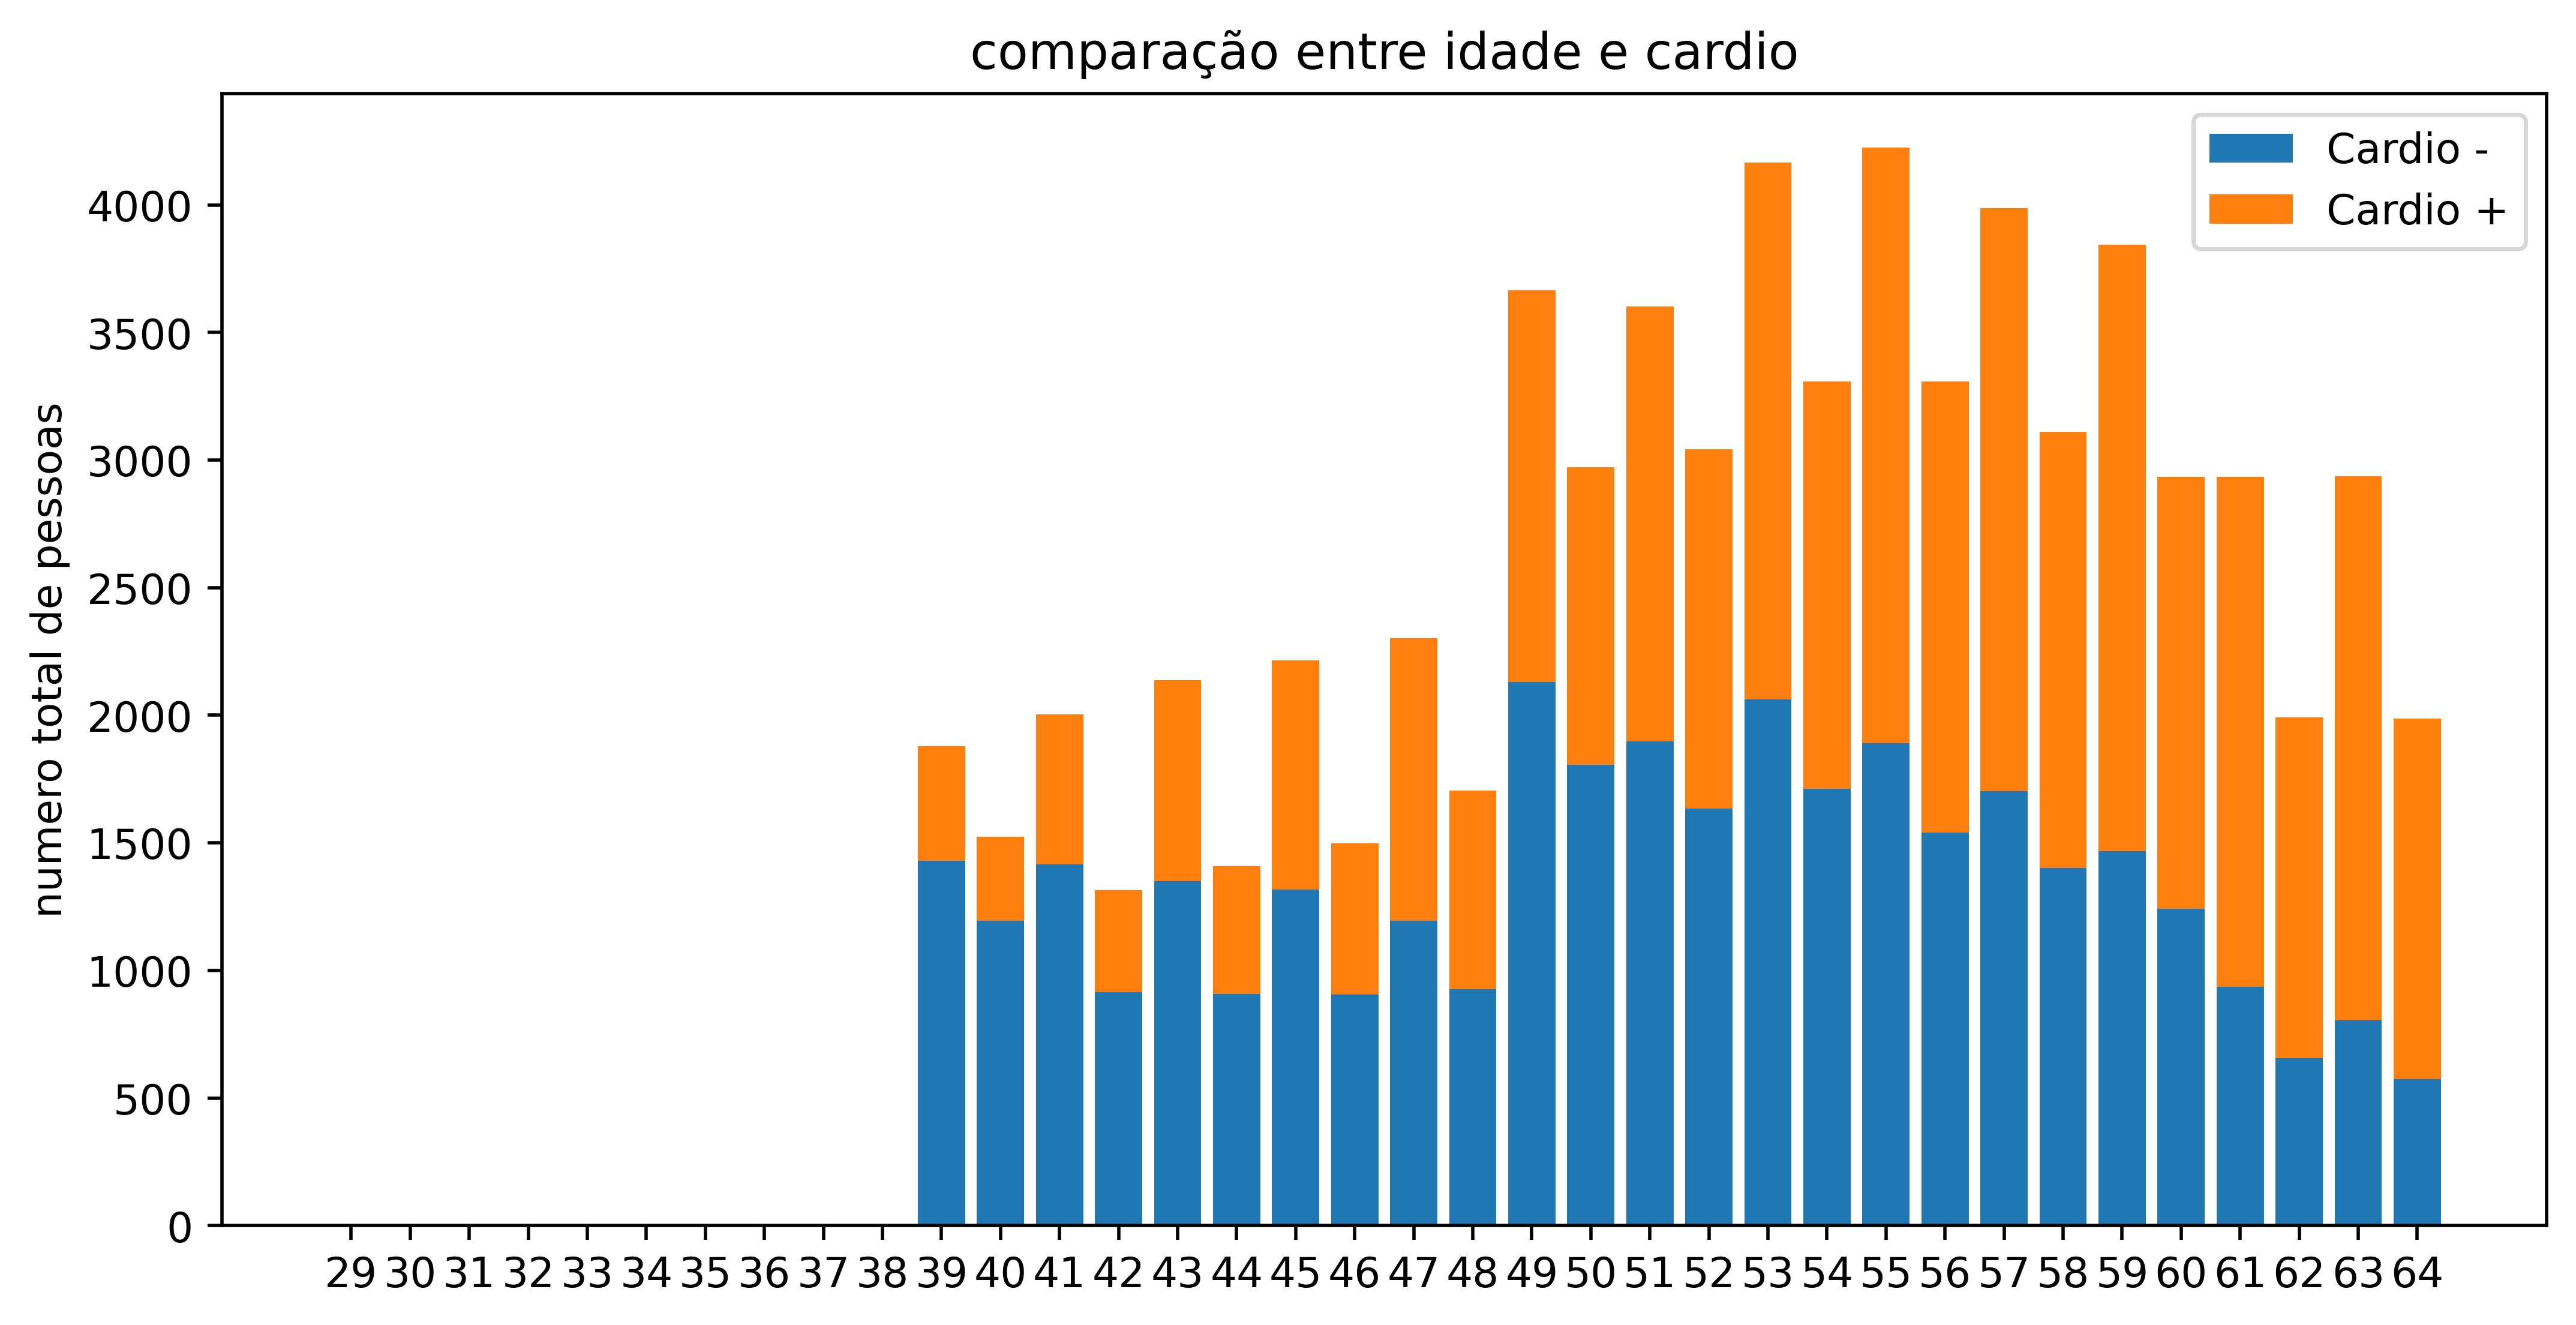

In [14]:
plt.figure(figsize = (10,5), dpi = 500)
plt.bar(idades, nproblema, label = 'Cardio -')
plt.bar(idades, problema, bottom = nproblema, label = 'Cardio +')

plt.title('comparação entre idade e cardio')

plt.ylabel('numero total de pessoas')
plt.xticks(np.arange(min(idades), max(idades) + 1))

plt.legend()

### É possivel visualizar que antes dos 39 anos existem pouquissimos valores, o que pode ter sido causado por erro de digitação, por isso valores menores que 39 serão removidos.

In [15]:
x = df['age_int'] < 39
x.value_counts()

False    69996
True         4
Name: age_int, dtype: int64

In [16]:
x

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: age_int, Length: 70000, dtype: bool

In [17]:
df = df.loc[~x].copy()

# visualziando e tratando Pressão sistolica e diastolica

### O primeiro passo é a visualizar a presença de valores onde a pressão sistolica é menor que a diastolica, pois não é uma situação possivel de existir

In [18]:
x = df['ap_hi'] > df['ap_lo']

In [19]:
x.value_counts()

True     68760
False     1236
dtype: int64

In [20]:
df = df.loc[x].copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68760 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68760 non-null  int64  
 1   age          68760 non-null  int64  
 2   gender       68760 non-null  int64  
 3   height       68760 non-null  int64  
 4   weight       68760 non-null  float64
 5   ap_hi        68760 non-null  int64  
 6   ap_lo        68760 non-null  int64  
 7   cholesterol  68760 non-null  int64  
 8   gluc         68760 non-null  int64  
 9   smoke        68760 non-null  int64  
 10  alco         68760 non-null  int64  
 11  active       68760 non-null  int64  
 12  cardio       68760 non-null  int64  
 13  age_int      68760 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.6 MB


In [22]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_int
count,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000,68760.000000
mean,49977.996611,19464.644255,1.348618,164.359584,74.114245,128.841390,81.245739,1.364689,1.225596,0.087885,0.053345,0.803447,0.494793,52.791739
std,28842.896559,2467.477466,0.476536,8.190647,14.330726,155.208093,9.693592,0.678897,0.571462,0.283130,0.224722,0.397394,0.499977,6.763012
min,0.000000,14275.000000,1.000000,55.000000,11.000000,12.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,25008.750000,17657.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50022.500000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74867.250000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


# Detecção de outliers 

In [23]:
print (sorted(df['ap_hi'].unique()))

[12, 13, 15, 16, 24, 60, 70, 80, 85, 90, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 184, 185, 187, 188, 190, 191, 193, 195, 196, 197, 200, 202, 210, 215, 220, 230, 240, 309, 401, 701, 806, 902, 906, 907, 909, 960, 1110, 1130, 1202, 1205, 1300, 1400, 1409, 1420, 1500, 1620, 2000, 11020, 11500, 13010, 14020, 16020]


In [24]:
print (sorted(df['ap_lo'].unique()))

[-70, 0, 1, 6, 7, 8, 9, 10, 15, 20, 30, 40, 45, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 125, 126, 130, 140, 150, 160, 170, 180, 182]


### Primeiro é preciso descobrir se a pressão foi registrada como 12/8 ou 120/80 e para isso basta dividir cada valor presente por 10 e pegar os valores em que o resto deu 0, se o numero de verdadeiros dessa situação for bem discrepante, quer dizer que a pressão foi registrada como 120/80 o que é o esperado.

In [25]:
x = df['ap_hi']%10 == 0

In [26]:
x.value_counts()

True     66708
False     2052
Name: ap_hi, dtype: int64

In [27]:
df = df.loc[x].copy()

In [28]:
x = df['ap_lo']%10 == 0

In [29]:
x.value_counts()

True     65510
False     1198
Name: ap_lo, dtype: int64

In [30]:
df = df.loc[x].copy()

### O passo seguinte consta em visualizar graficamente a pressão sistolica e diastolica, porem antes disso será removido os valores em que a pressão diastolica é superior a 240 pois claramente é um outlier

In [31]:
print (sorted(df['ap_hi'].unique()))

[60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 960, 1110, 1130, 1300, 1400, 1420, 1500, 1620, 2000, 11020, 11500, 13010, 14020, 16020]


In [32]:
x = df['ap_hi'] < 960

In [33]:
df = df.loc[x].copy()

In [34]:
print (sorted(df['ap_lo'].unique()))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


In [35]:
sistolicas = sorted(df['ap_hi'].unique())
sis = []

In [36]:
for k in sistolicas:
    sistolica = df[(df['ap_hi'] == k)]
    
    sis.append(len(sistolica))

No handles with labels found to put in legend.


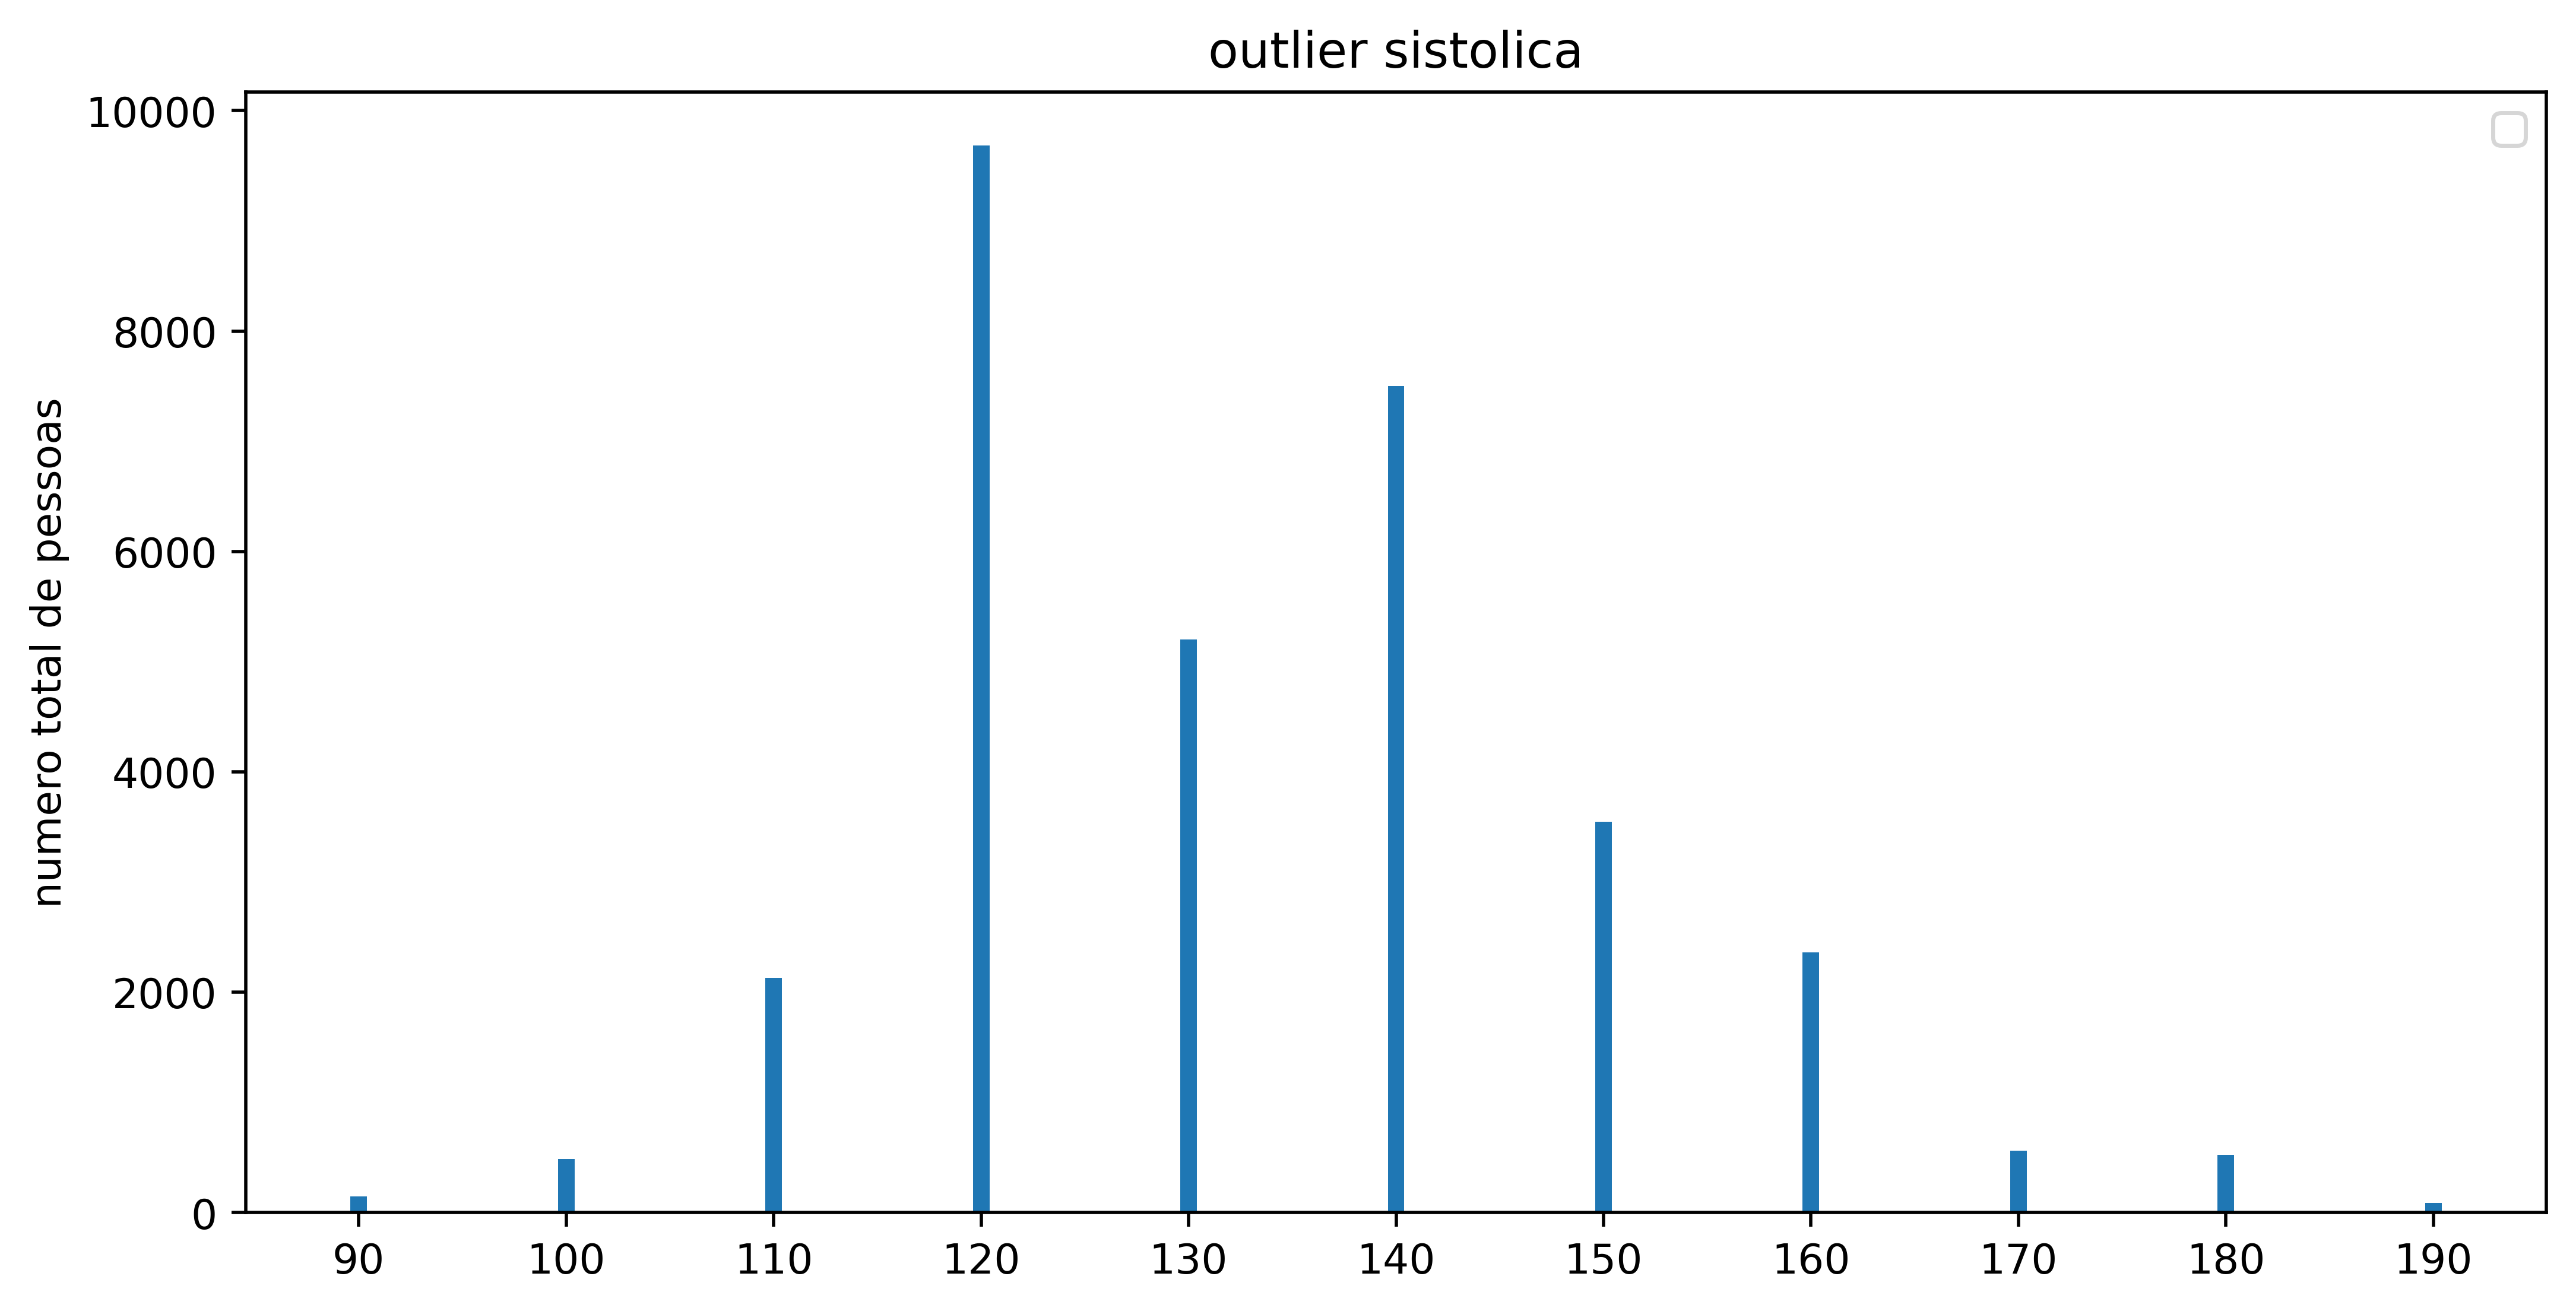

In [109]:
plt.figure(figsize = (10,5), dpi = 500)
plt.bar(sistolicas, sis)
plt.title('outlier sistolica')
plt.xticks(np.arange(min(sistolicas), max(sistolicas) + 1, 10))
plt.ylabel('numero total de pessoas')

plt.legend()

### É possivel oberservar que nesse atributo existem poucos acontecimentos onde a pressão é menor que 90 ou maior que 190, portanto em ambos os casos séra verificado o numero de ocorrencias e se forem um numero insignificante serão removidos

In [38]:
x = df['ap_hi'] < 90

In [39]:
x.value_counts()

False    65423
True        65
Name: ap_hi, dtype: int64

In [40]:
df = df.loc[~x].copy()

In [41]:
x = df['ap_hi'] > 190

In [42]:
x.value_counts()

False    65279
True       144
Name: ap_hi, dtype: int64

In [43]:
df = df.loc[~x].copy()

In [44]:
sistolicas = sorted(df['ap_hi'].unique())
sis = []
nsis = []

In [45]:
for k in sistolicas:
    idade = df[(df['ap_hi'] == k)]
    doenca = idade[(idade['cardio'] == 1)]
    sis.append(len(doenca))
    ndoenca = idade[(idade['cardio'] == 0)]
    nsis.append(len(ndoenca))

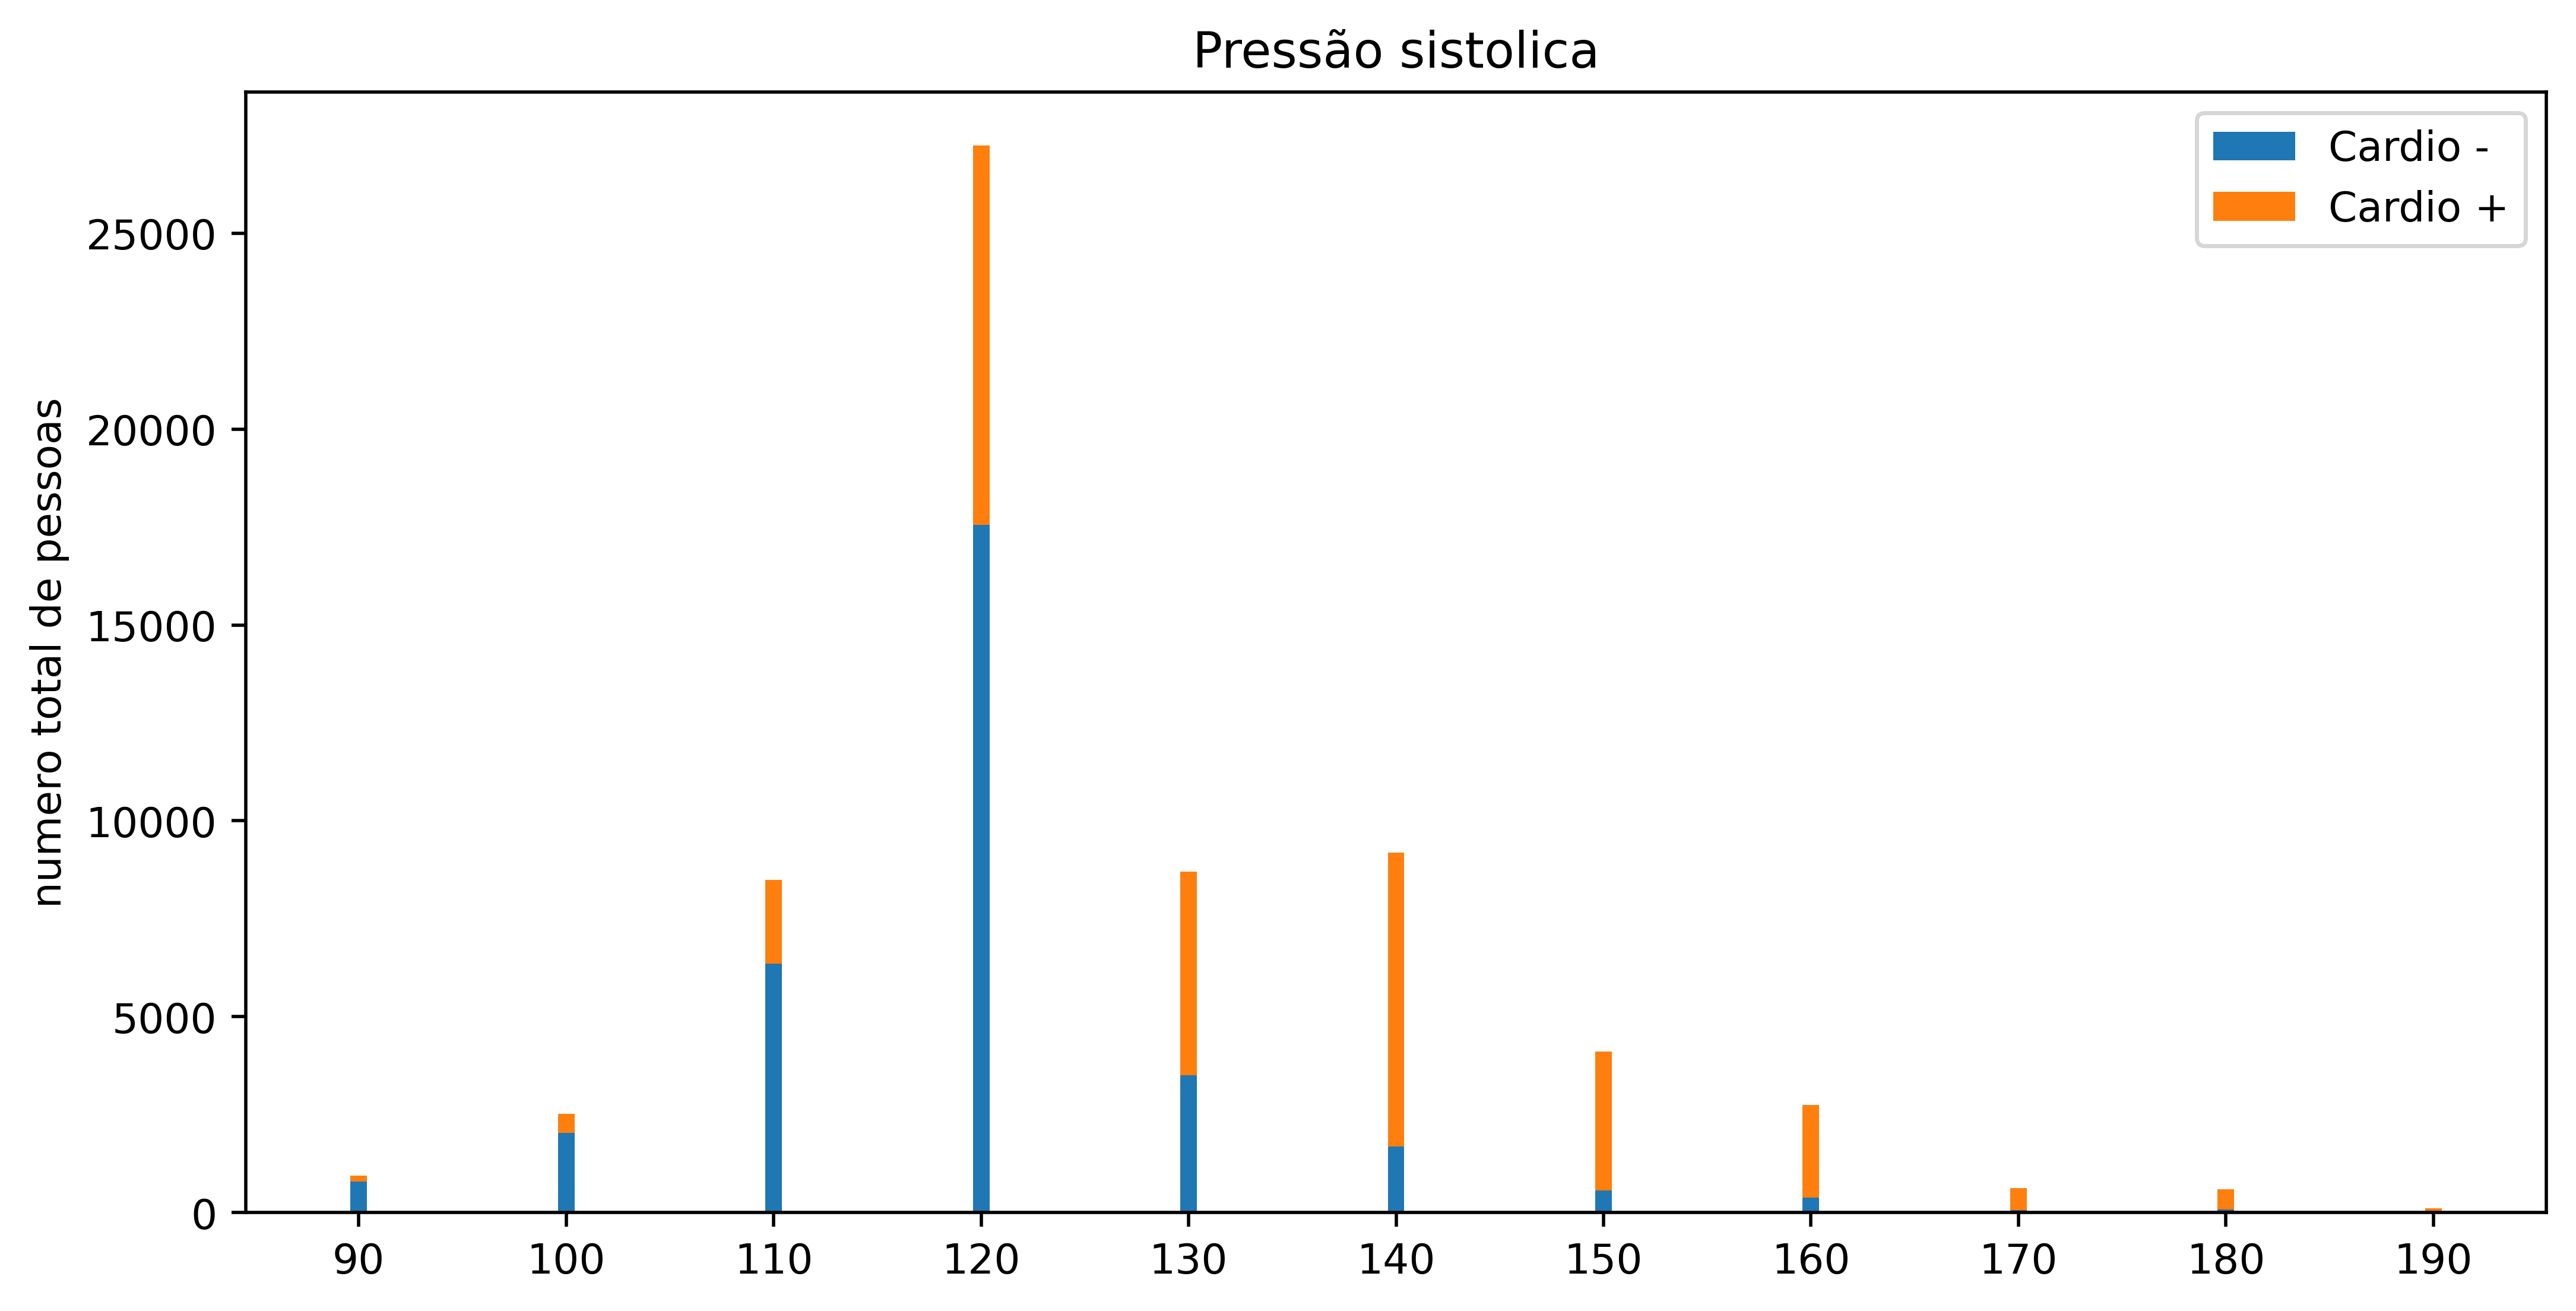

In [46]:
plt.figure(figsize = (10,5), dpi = 500)
plt.bar(sistolicas, nsis, label = 'Cardio -')
plt.bar(sistolicas, sis, bottom = nsis, label = 'Cardio +')

plt.title('Pressão sistolica')
plt.xticks(np.arange(min(sistolicas), max(sistolicas) + 1, 10))
plt.ylabel('numero total de pessoas')

plt.legend()

### É possivel observar que quanto maior a pressão sistolica maior a porcentagem de casos de doença cardiaca

In [47]:
diastolicas = sorted(df['ap_lo'].unique())
dis = []

In [48]:
for k in diastolicas:
    idade = df[(df['ap_lo'] == k)]
    dis.append(len(idade))

No handles with labels found to put in legend.


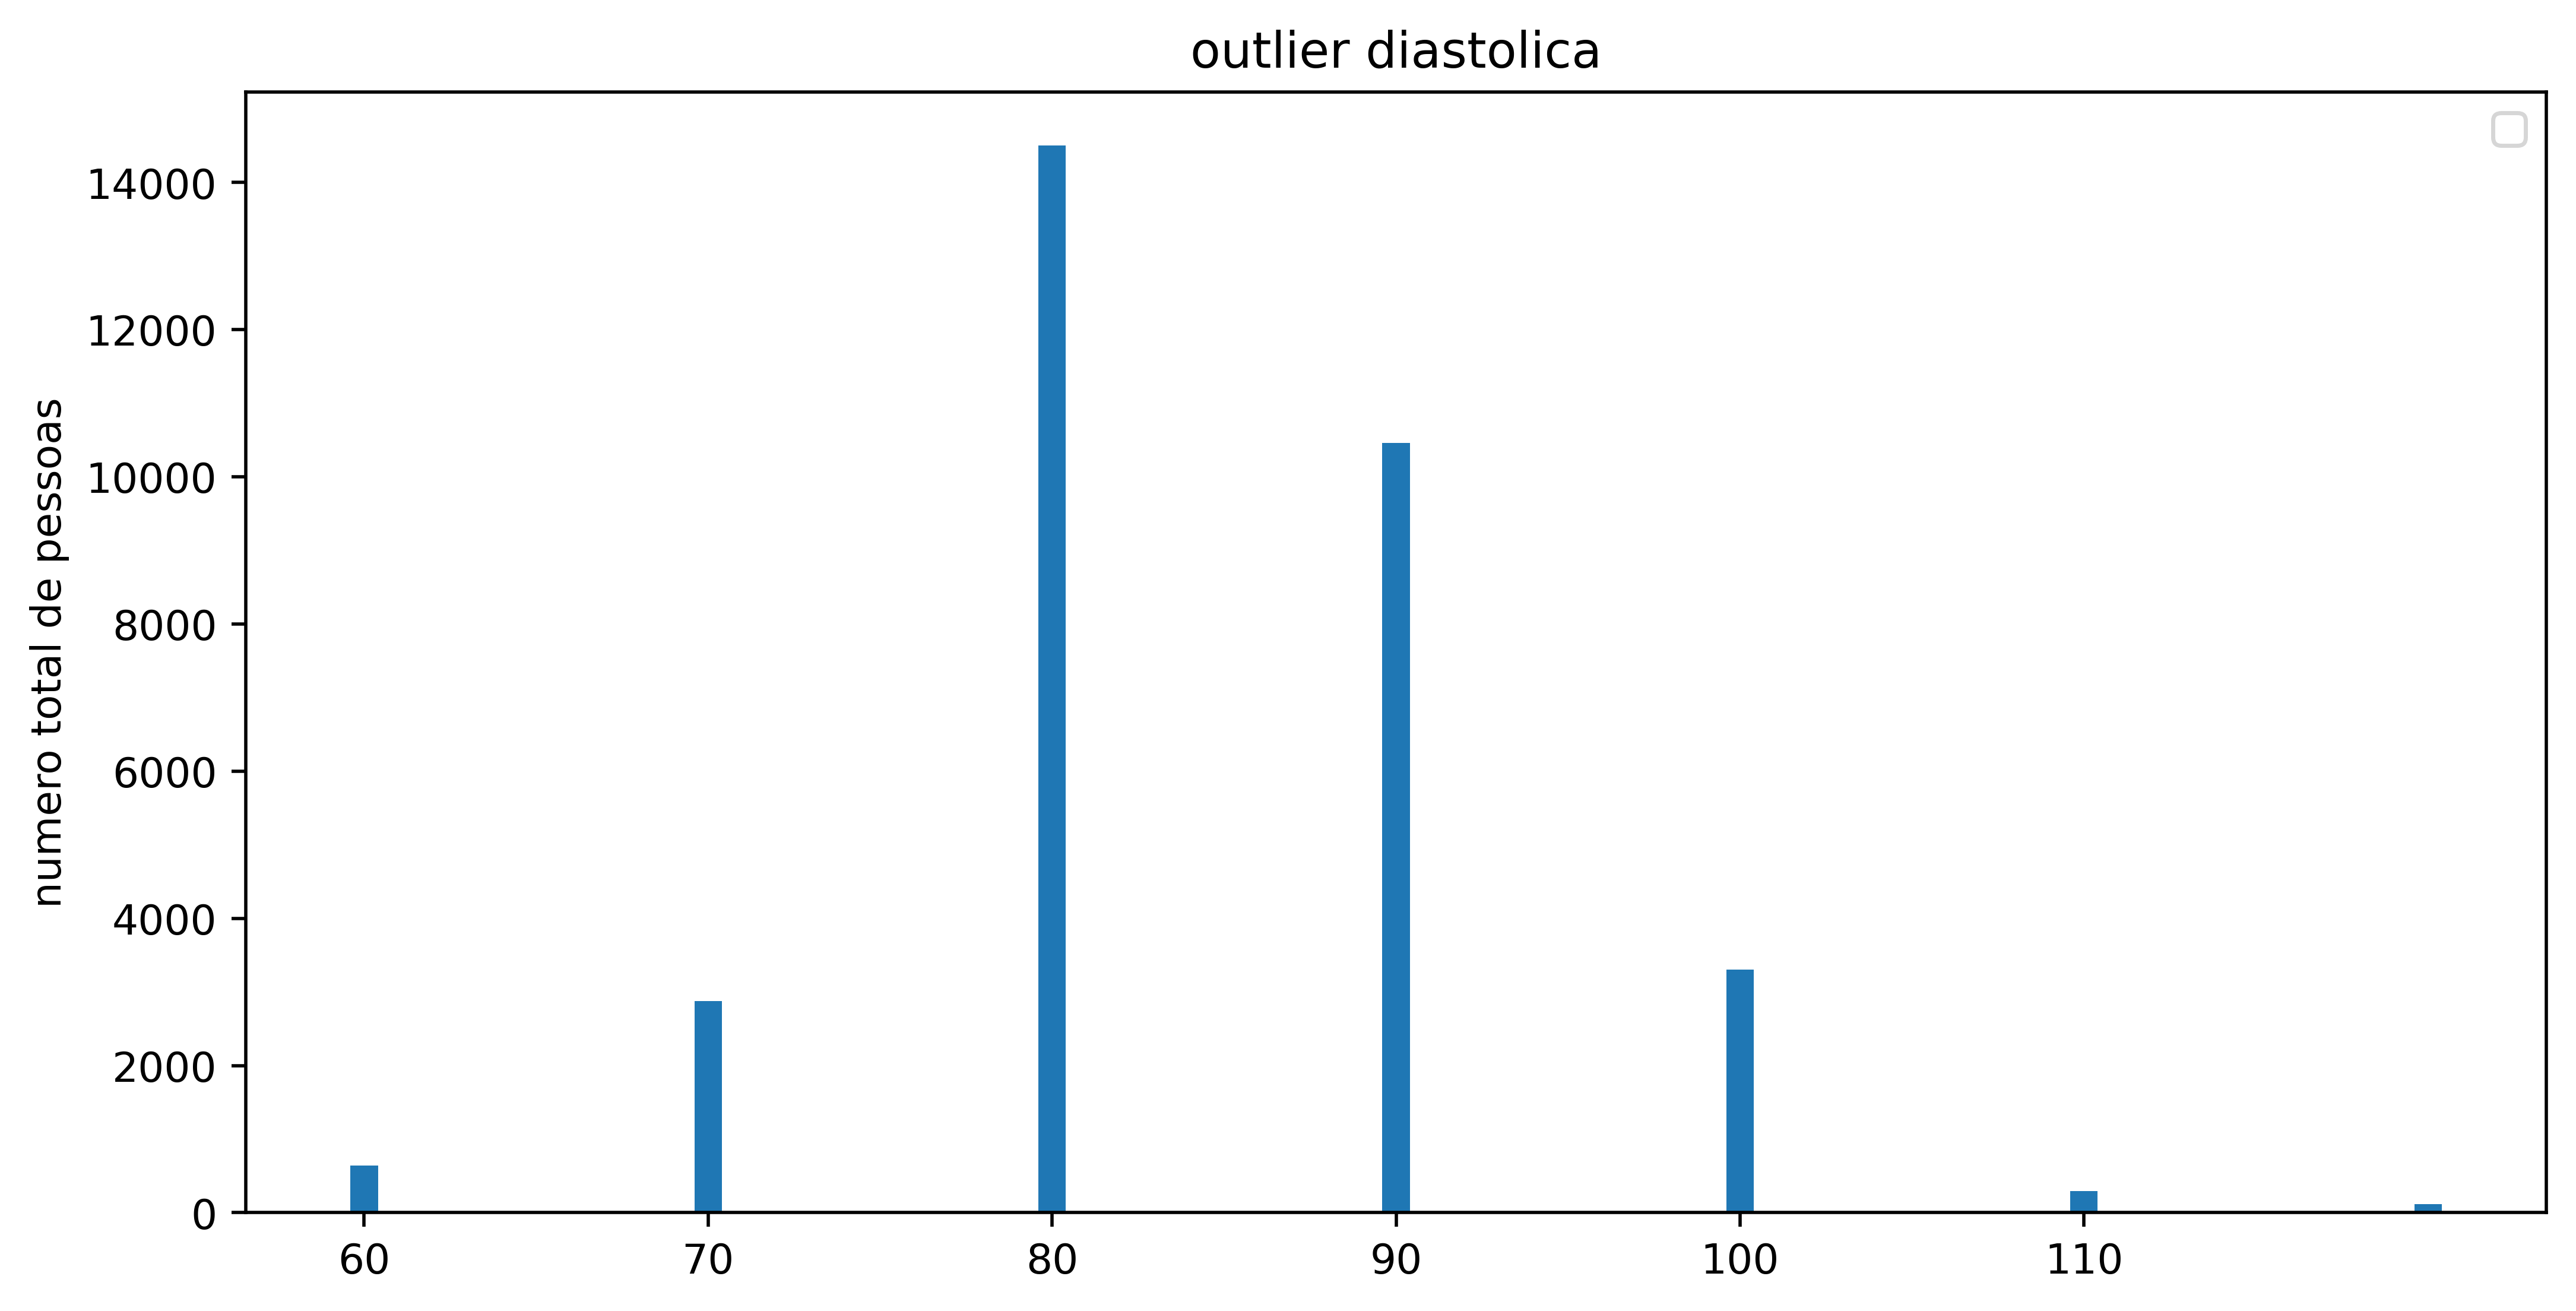

In [110]:
plt.figure(figsize = (10,5), dpi = 500)
plt.bar(diastolicas, dis)

plt.title('outlier diastolica')
plt.xticks(np.arange(min(diastolicas), max(diastolicas), 10))
plt.ylabel('numero total de pessoas')

plt.legend()

### É possivel oberservar que nesse atributo existem poucos acontecimentos onde a pressão é menor que 60 ou maior que 120, portanto em ambos os casos séra verificado o numero de ocorrencias e se forem um numero insignificante serão removidos

In [50]:
x = df['ap_lo'] < 60
x.value_counts()

False    65193
True        86
Name: ap_lo, dtype: int64

In [51]:
df = df.loc[~x].copy()

In [52]:
x = df['ap_lo'] > 120
x.value_counts()

False    65182
True        11
Name: ap_lo, dtype: int64

In [53]:
df = df.loc[~x].copy()

In [54]:
diastolicas = sorted(df['ap_lo'].unique())
dis = []
ndis = []

In [55]:
for k in diastolicas:
    idade = df[(df['ap_lo'] == k)]
    doenca = idade[(idade['cardio'] == 1)]
    dis.append(len(doenca))
    ndoenca = idade[(idade['cardio'] == 0)]
    ndis.append(len(ndoenca))

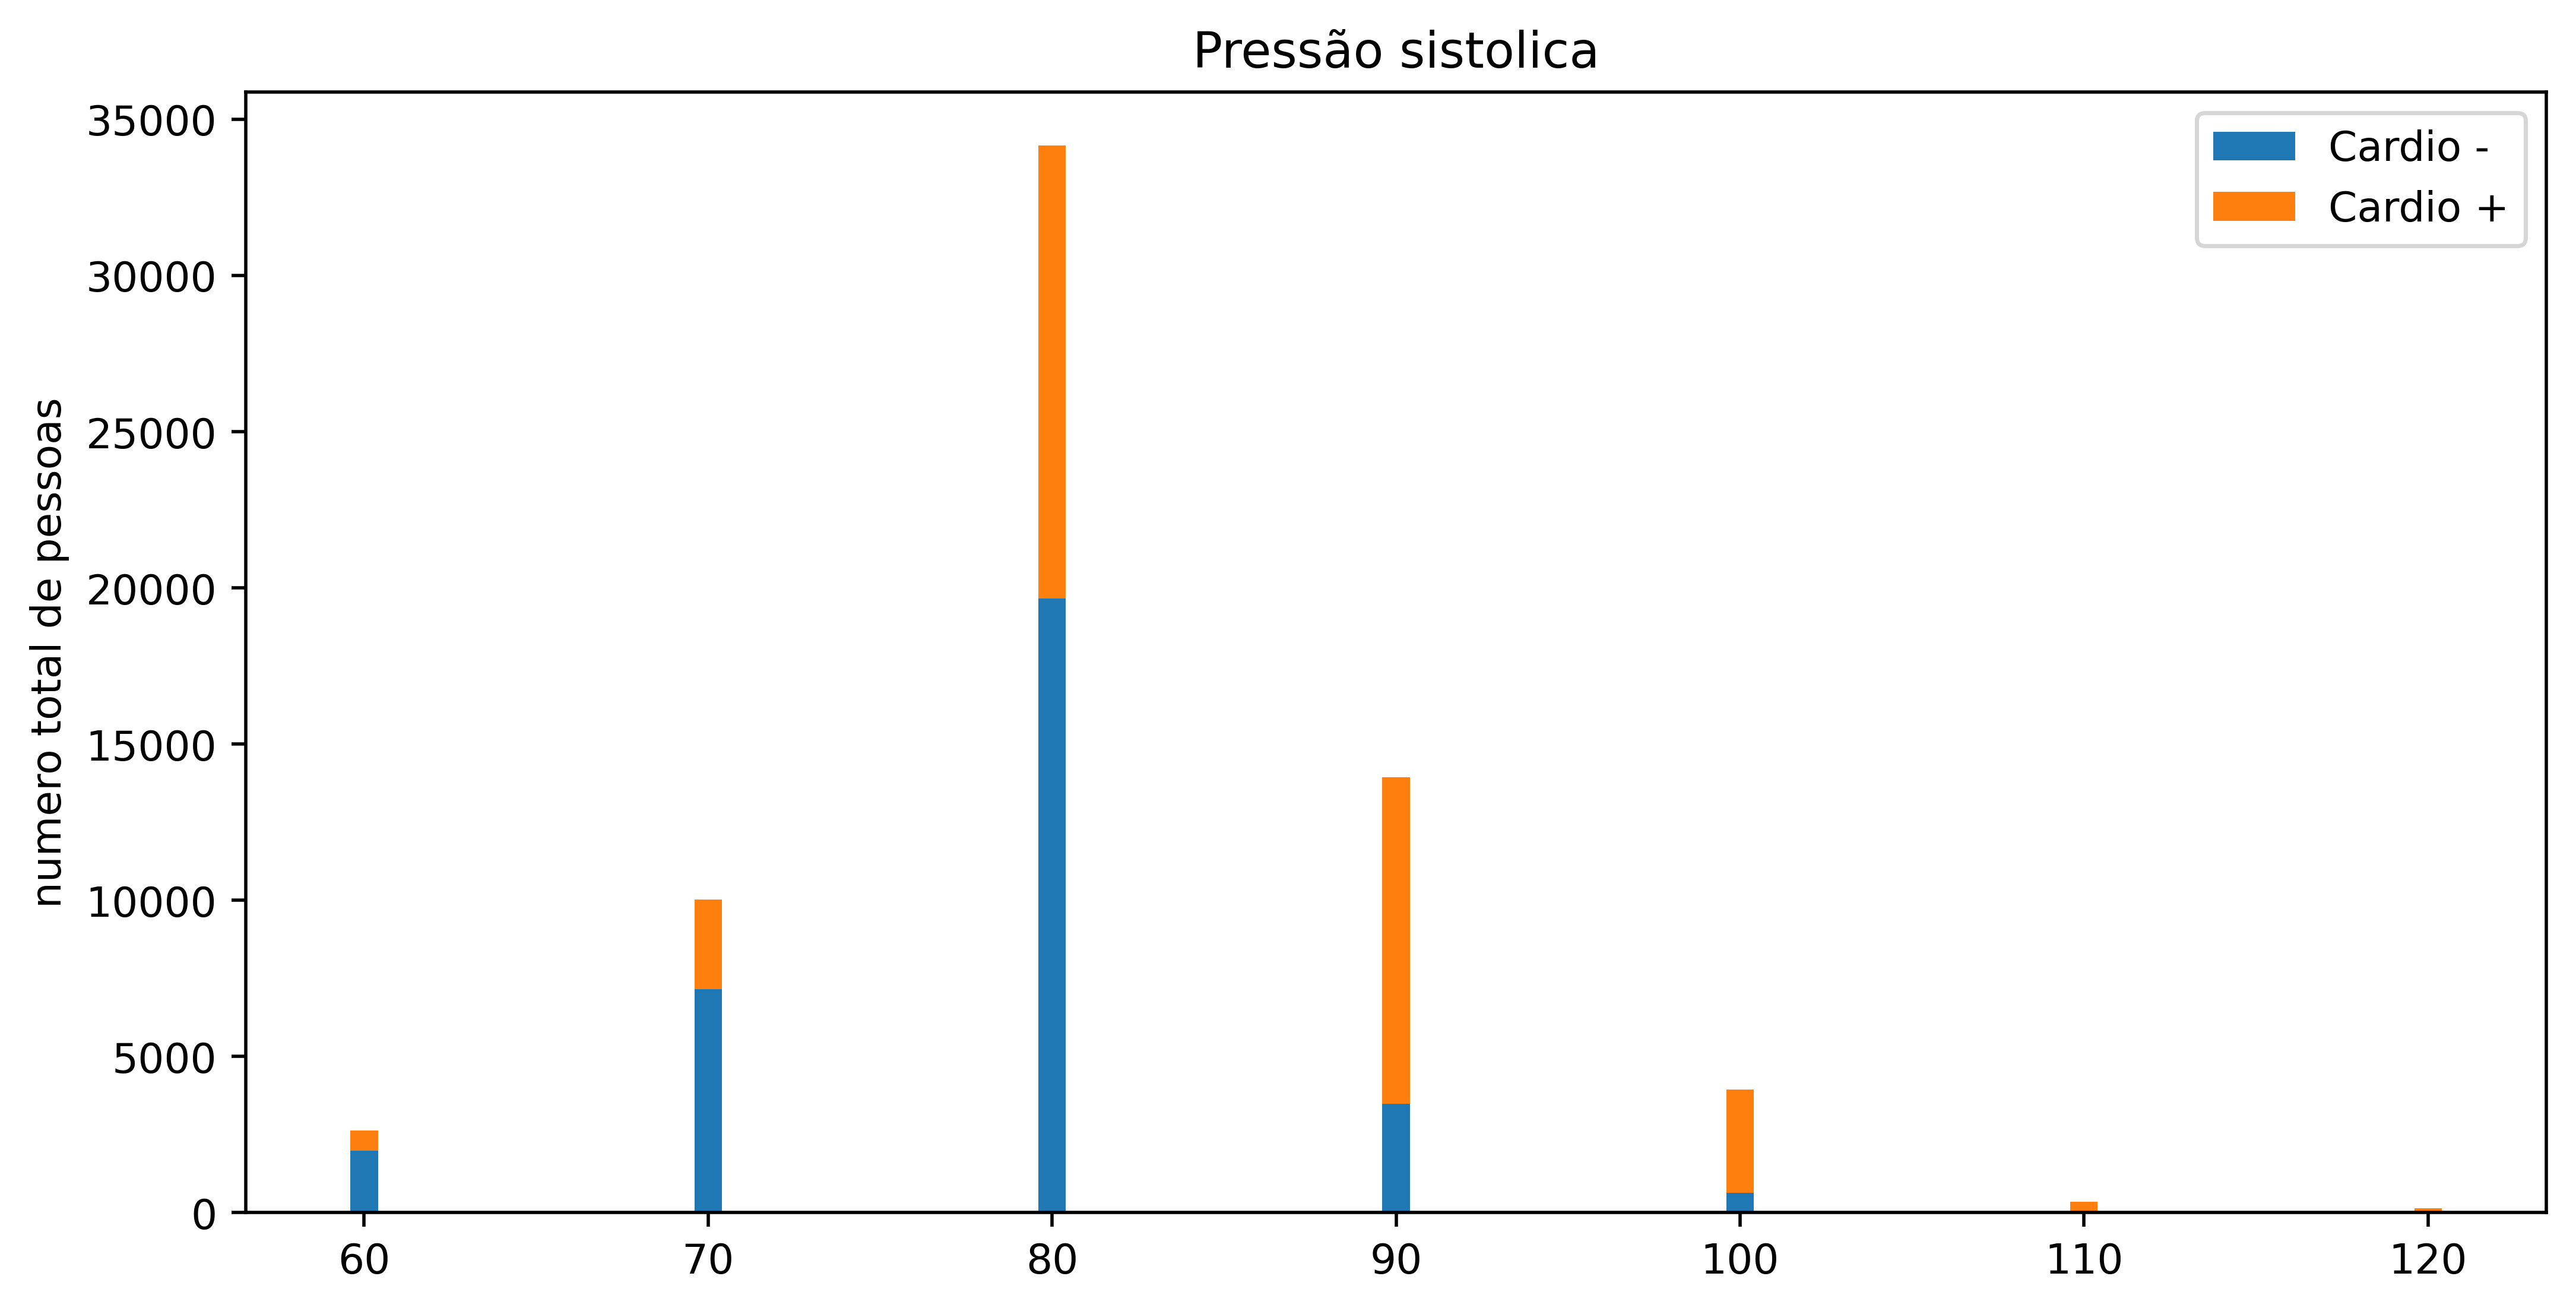

In [112]:
plt.figure(figsize = (10,5), dpi = 500)
plt.bar(diastolicas, ndis, label = 'Cardio -')
plt.bar(diastolicas, dis, bottom = ndis, label = 'Cardio +')

plt.title('Pressão sistolica')

plt.xticks(np.arange(min(diastolicas), max(diastolicas) + 1, 10))
plt.ylabel('numero total de pessoas')


plt.legend()


### É possivel observar que quanto maior a pressão diastolica maior a porcentagem de casos de doença cardiaca

# Visualizar e tratar Altura e peso - Ainda não encontrei um plot bom o suficiente para tratar corretamente os dados

### Para este caso será usado o IMC pois nele já é levado em consideração a altura e o peso.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65182 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           65182 non-null  int64  
 1   age          65182 non-null  int64  
 2   gender       65182 non-null  int64  
 3   height       65182 non-null  int64  
 4   weight       65182 non-null  float64
 5   ap_hi        65182 non-null  int64  
 6   ap_lo        65182 non-null  int64  
 7   cholesterol  65182 non-null  int64  
 8   gluc         65182 non-null  int64  
 9   smoke        65182 non-null  int64  
 10  alco         65182 non-null  int64  
 11  active       65182 non-null  int64  
 12  cardio       65182 non-null  int64  
 13  age_int      65182 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.2 MB


In [58]:
df['imc'] = df['weight']/((df['height']/100)**2)

In [59]:
peso = sorted(df['imc'].unique())
pes = []

In [60]:
for k in peso:
    idade = df[(df['imc'] == k)]
    pes.append(len(idade))

No handles with labels found to put in legend.


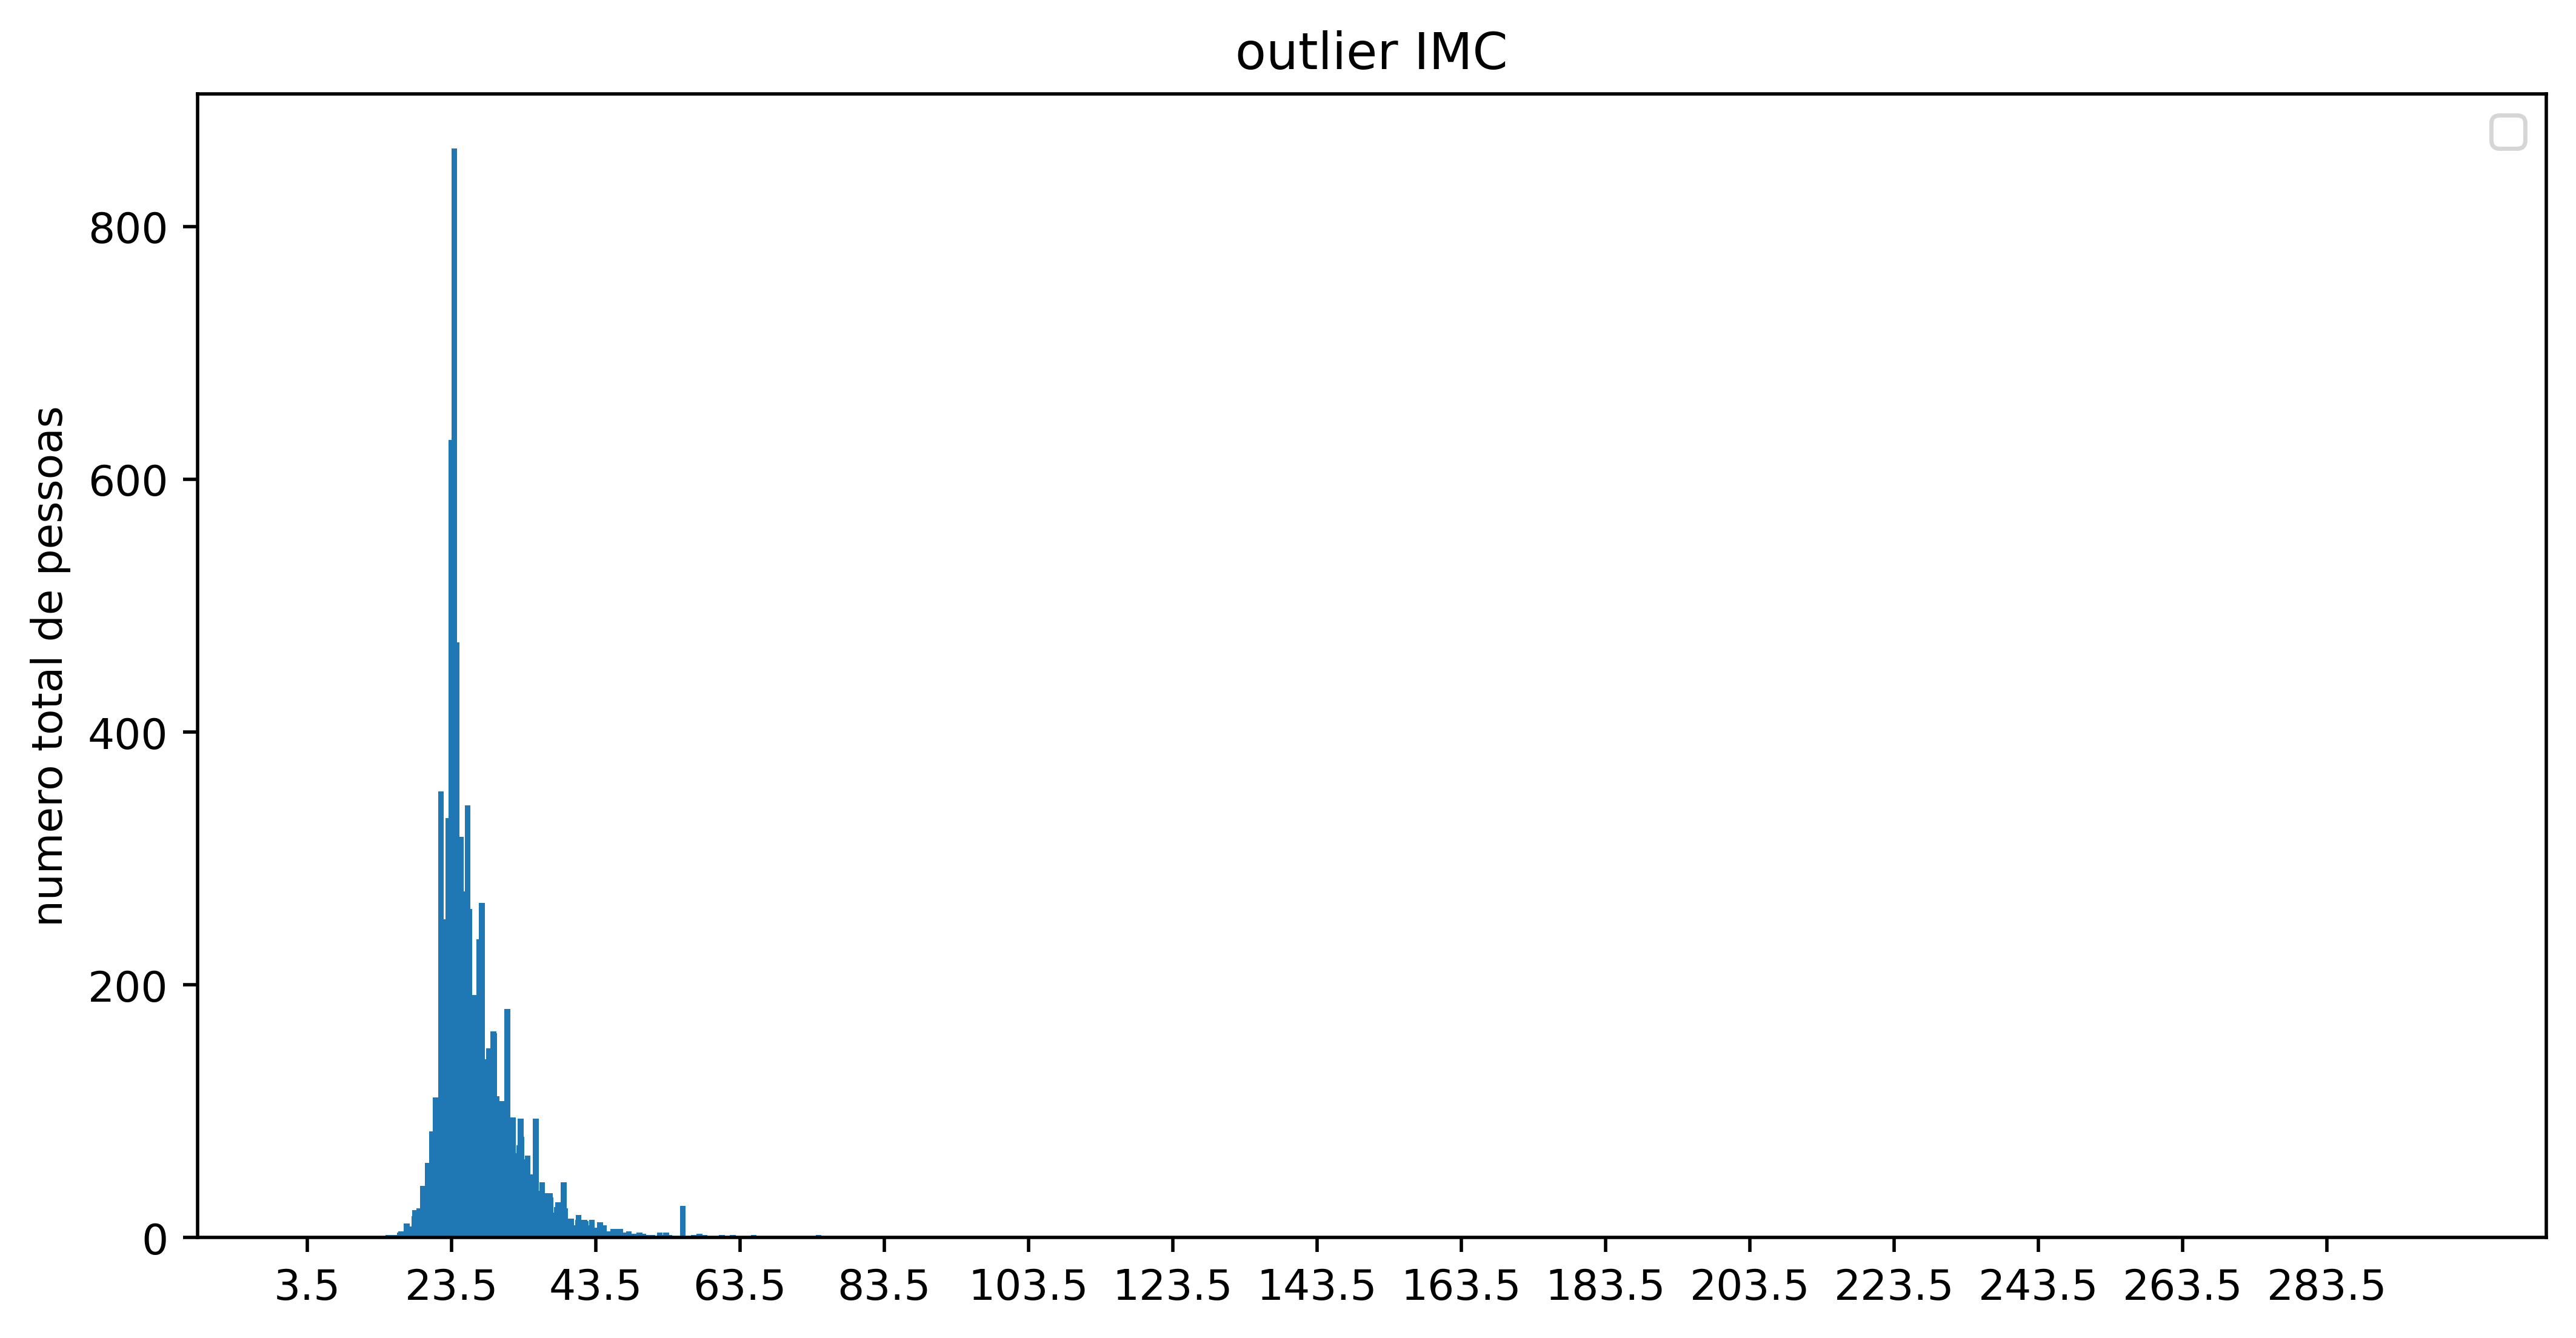

In [61]:
plt.figure(figsize = (10,5), dpi = 500)
plt.bar(peso, pes, )

plt.title('outlier IMC')

plt.xticks(np.arange(min(peso), max(peso) + 1, 20))
plt.ylabel('numero total de pessoas')

plt.legend()

<AxesSubplot:xlabel='imc'>

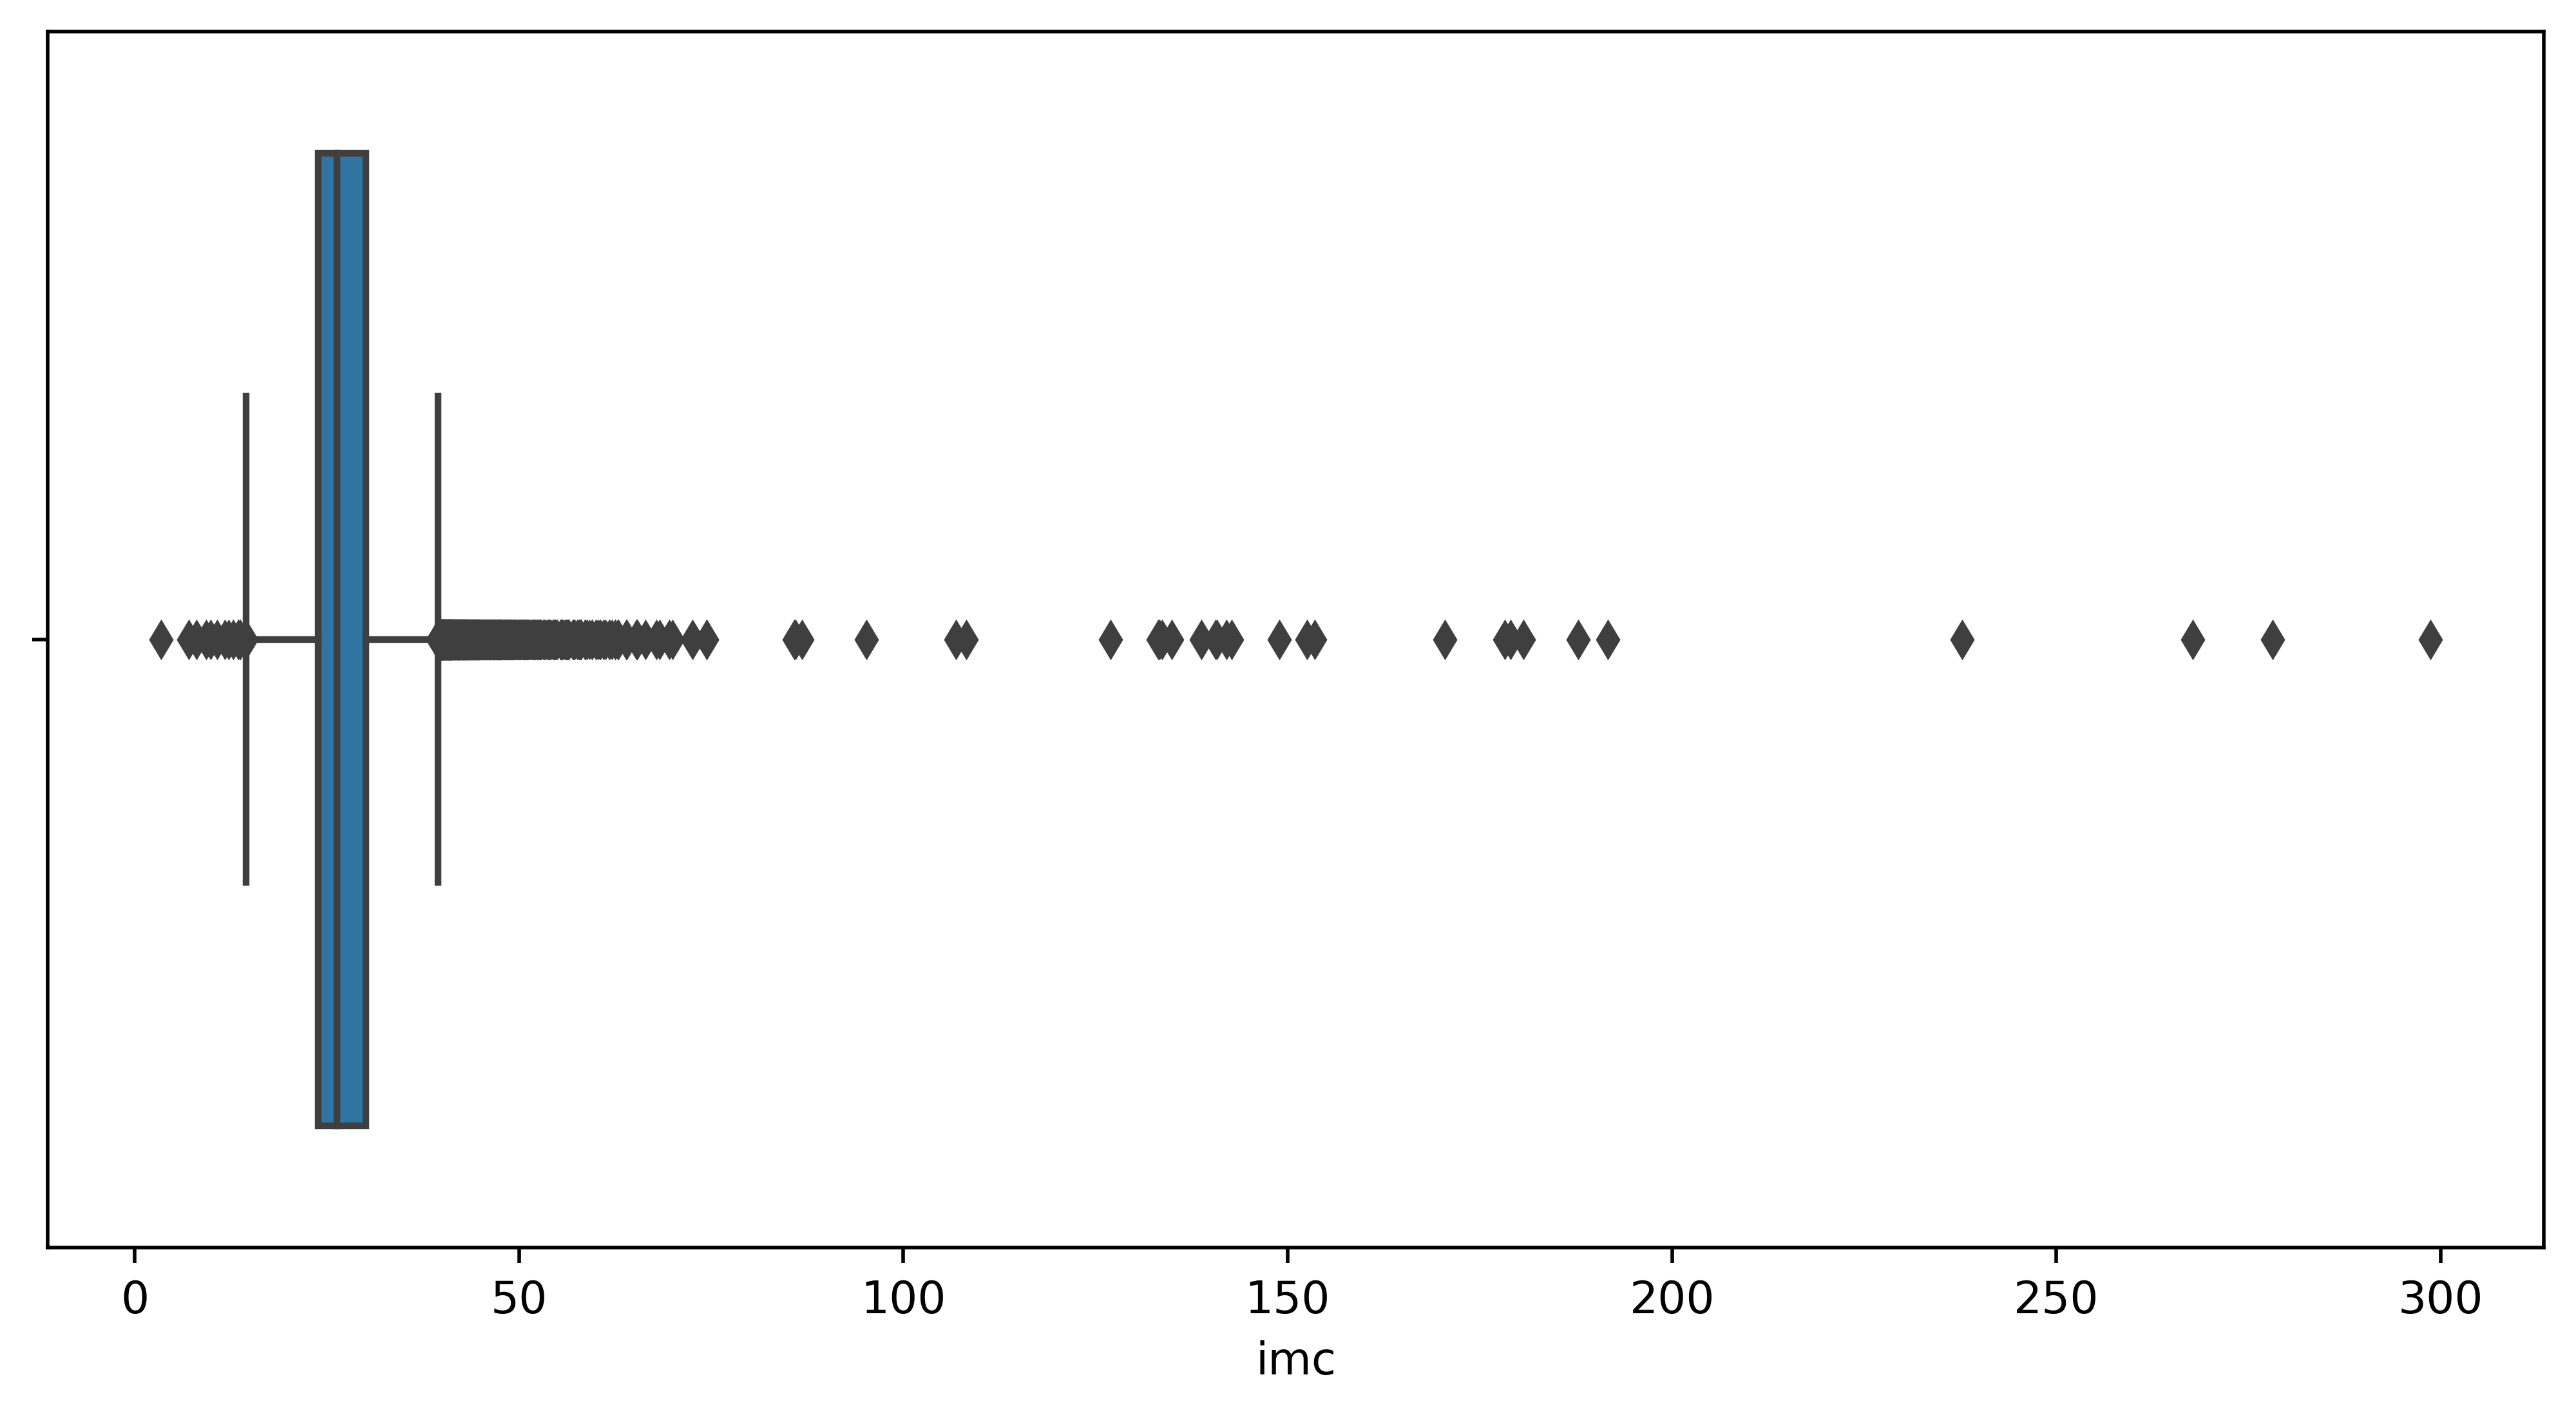

In [62]:
plt.figure(figsize = (10,5), dpi = 500)
sns.boxplot(x=df['imc'])

### É possivel observar que o numero de casos maior que 63.5 são poucos o que podem ser removidos e considerados como outlier

In [63]:
x = df['imc'] > 63.5
x.value_counts()

False    65138
True        44
Name: imc, dtype: int64

In [64]:
df = df.loc[~x].copy()

In [65]:
peso = sorted(df['imc'].unique())
pes = []

In [66]:
for k in peso:
    idade = df[(df['imc'] == k)]
    pes.append(len(idade))

No handles with labels found to put in legend.


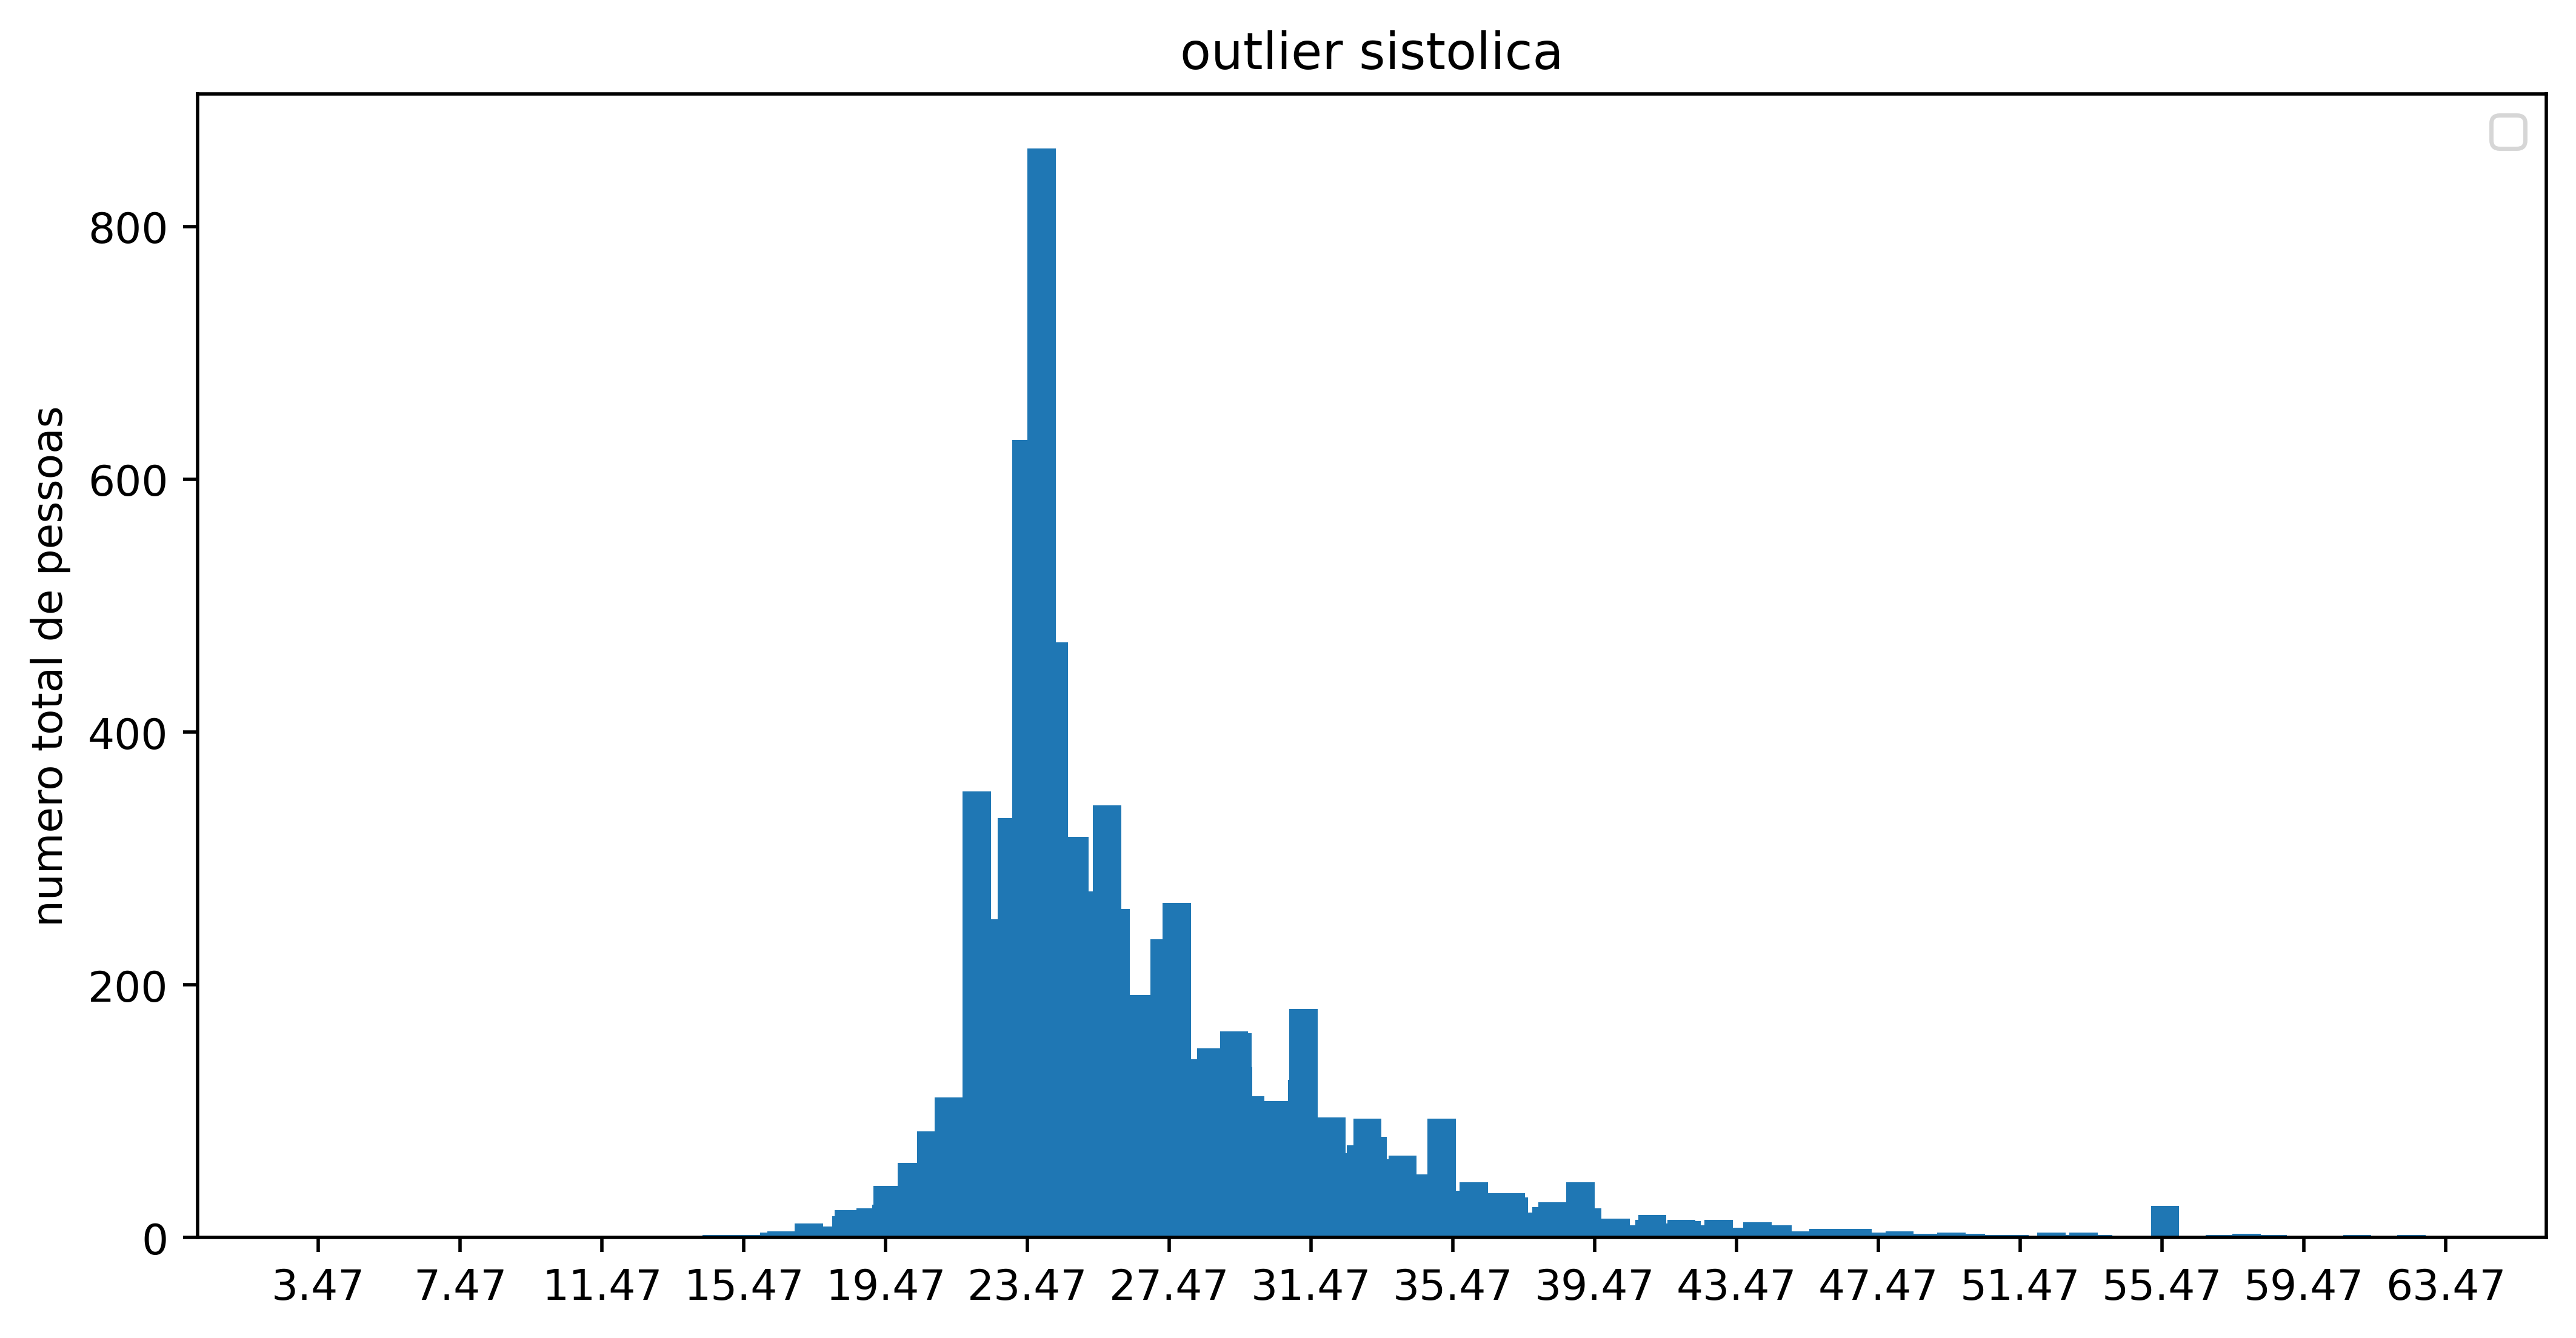

In [67]:
plt.figure(figsize = (10,5), dpi = 500)
plt.bar(peso, pes)
plt.title('outlier sistolica')
plt.xticks(np.arange(min(peso), max(peso) + 1, 4))
plt.ylabel('numero total de pessoas')
plt.legend()

<AxesSubplot:xlabel='imc'>

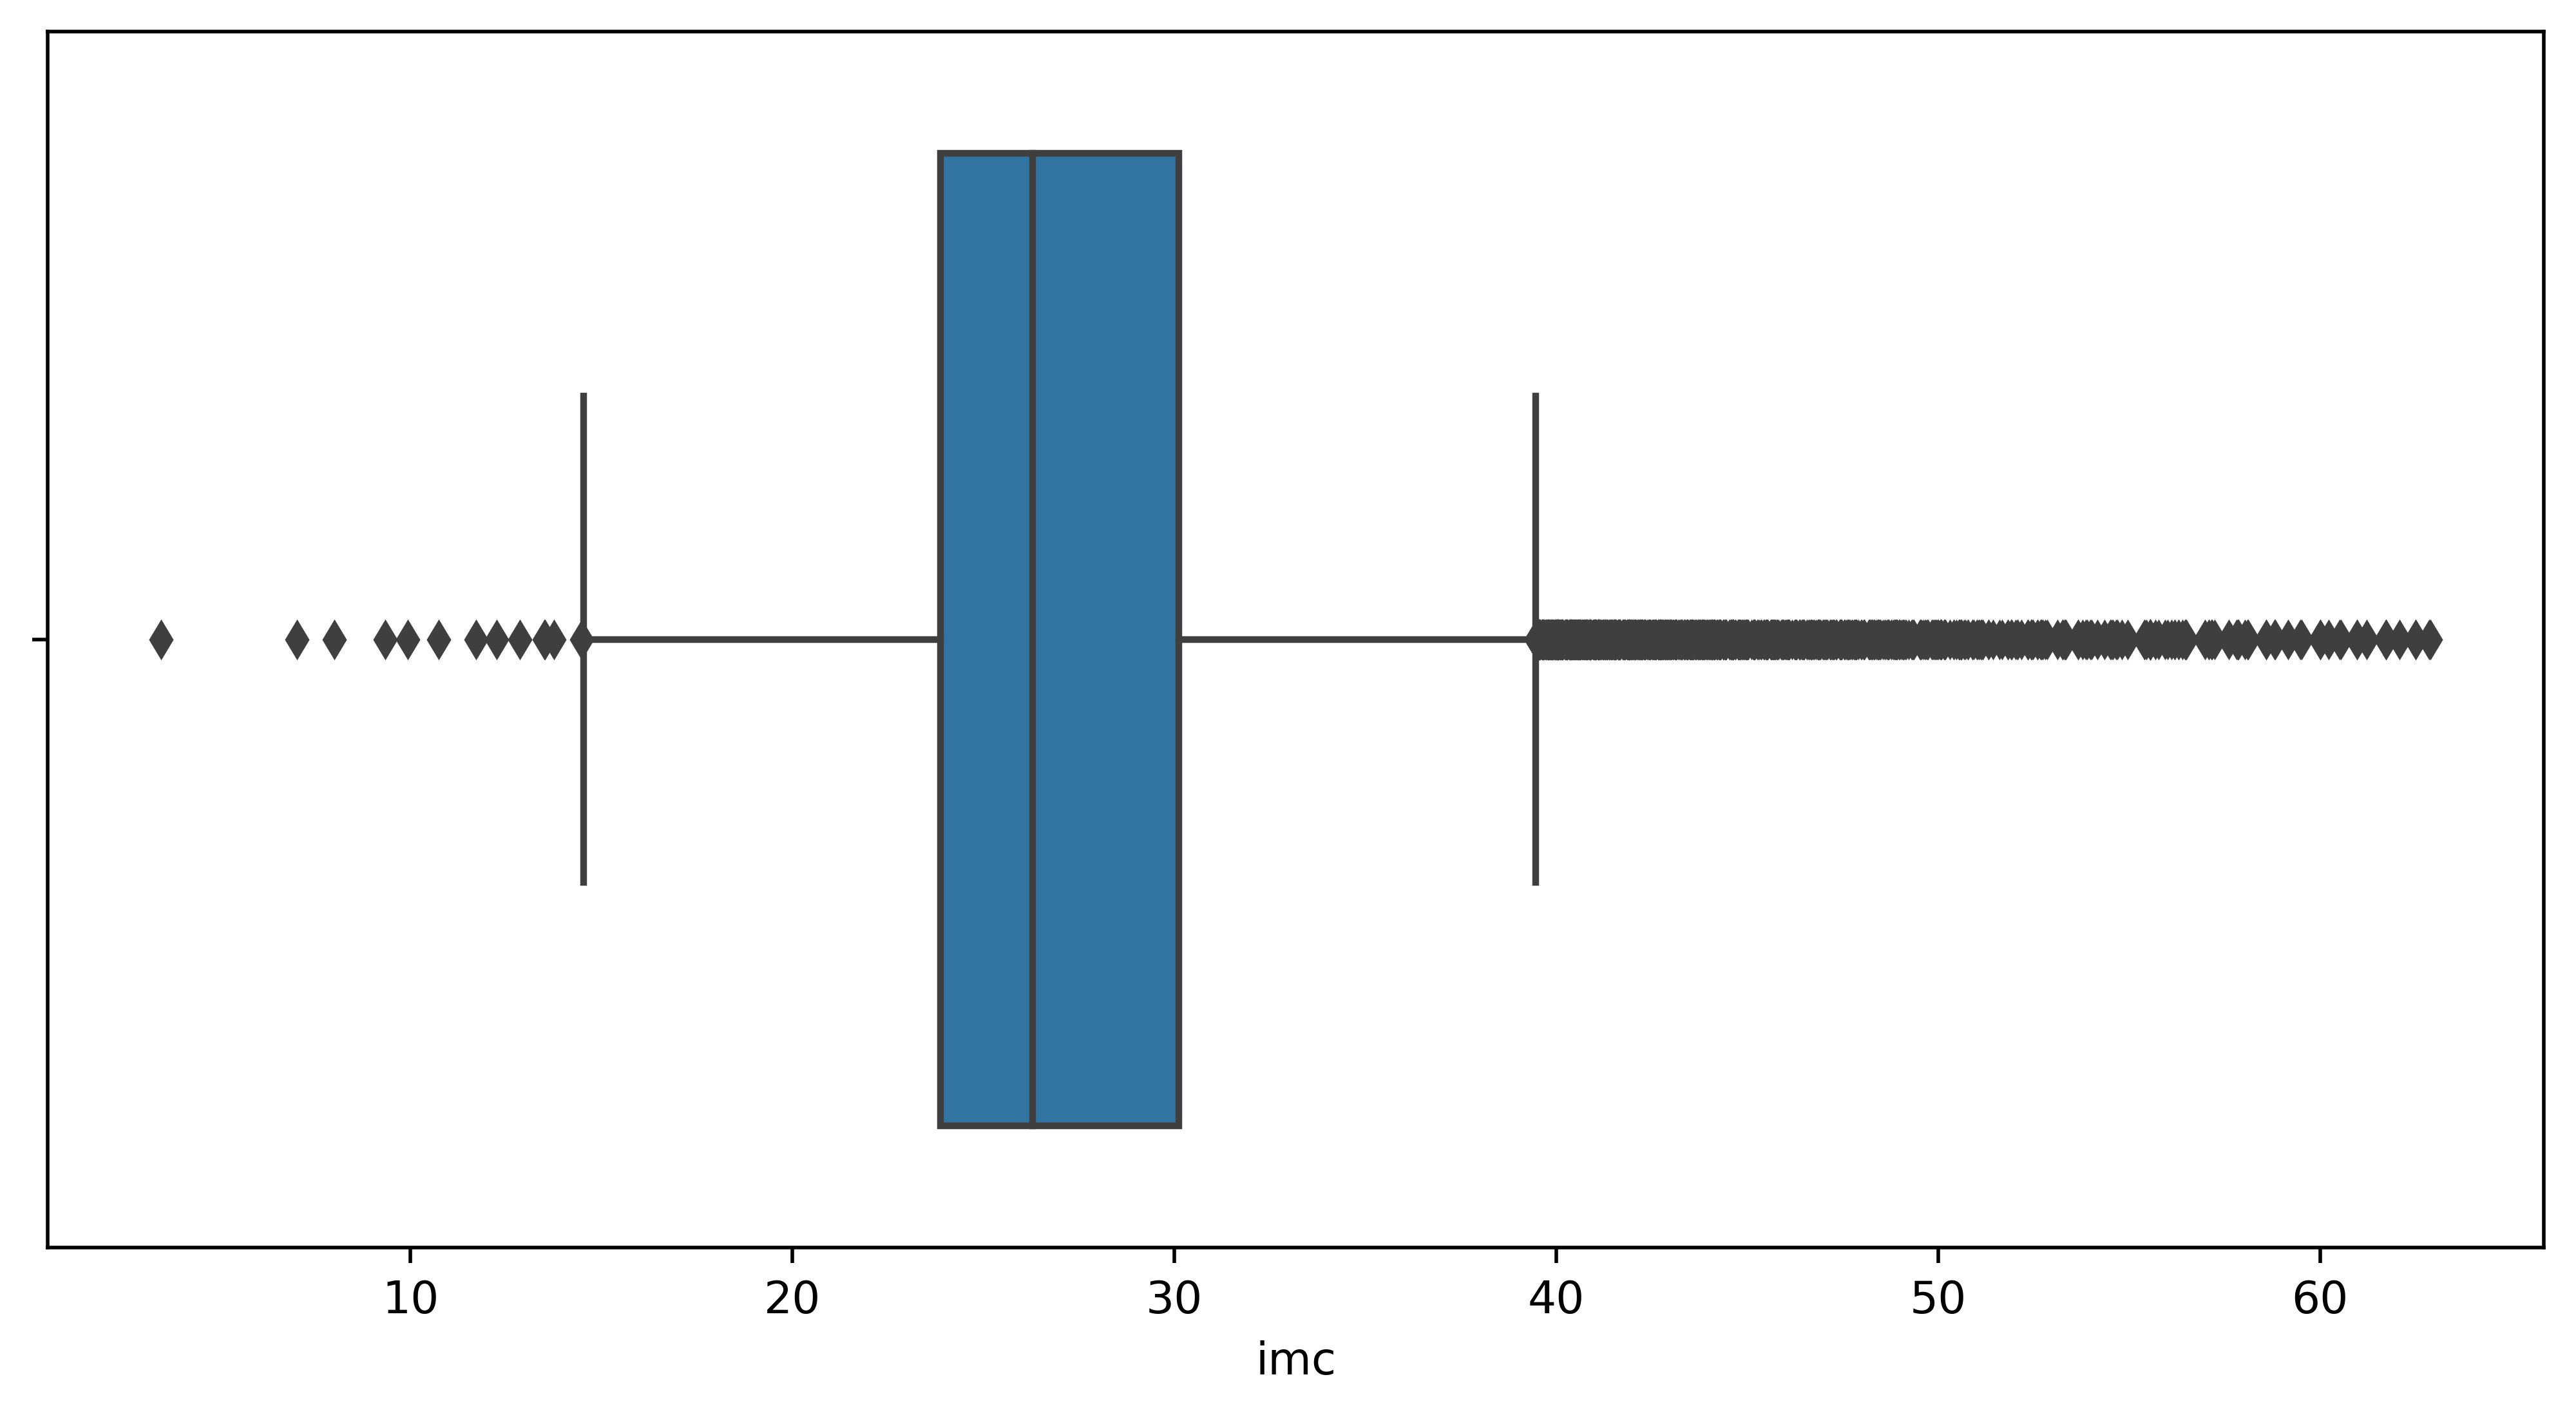

In [68]:
plt.figure(figsize = (10,5), dpi = 500)
sns.boxplot(x=df['imc'])

### É possivel observar que o numero de casos onde o IMC é maior que 55.47 e menor que 15.47 são poucos, o que podem ser considerados como outliers

In [69]:
x = df['imc'] > 55.47
x.value_counts()

False    65061
True        77
Name: imc, dtype: int64

In [70]:
df = df.loc[~x].copy()

In [71]:
x = df['imc'] < 15.47
x.value_counts()

False    65028
True        33
Name: imc, dtype: int64

In [72]:
df = df.loc[~x].copy()

In [73]:
peso = sorted(df['imc'].unique())
pes = []

In [74]:
for k in peso:
    idade = df[(df['imc'] == k)]
    pes.append(len(idade))

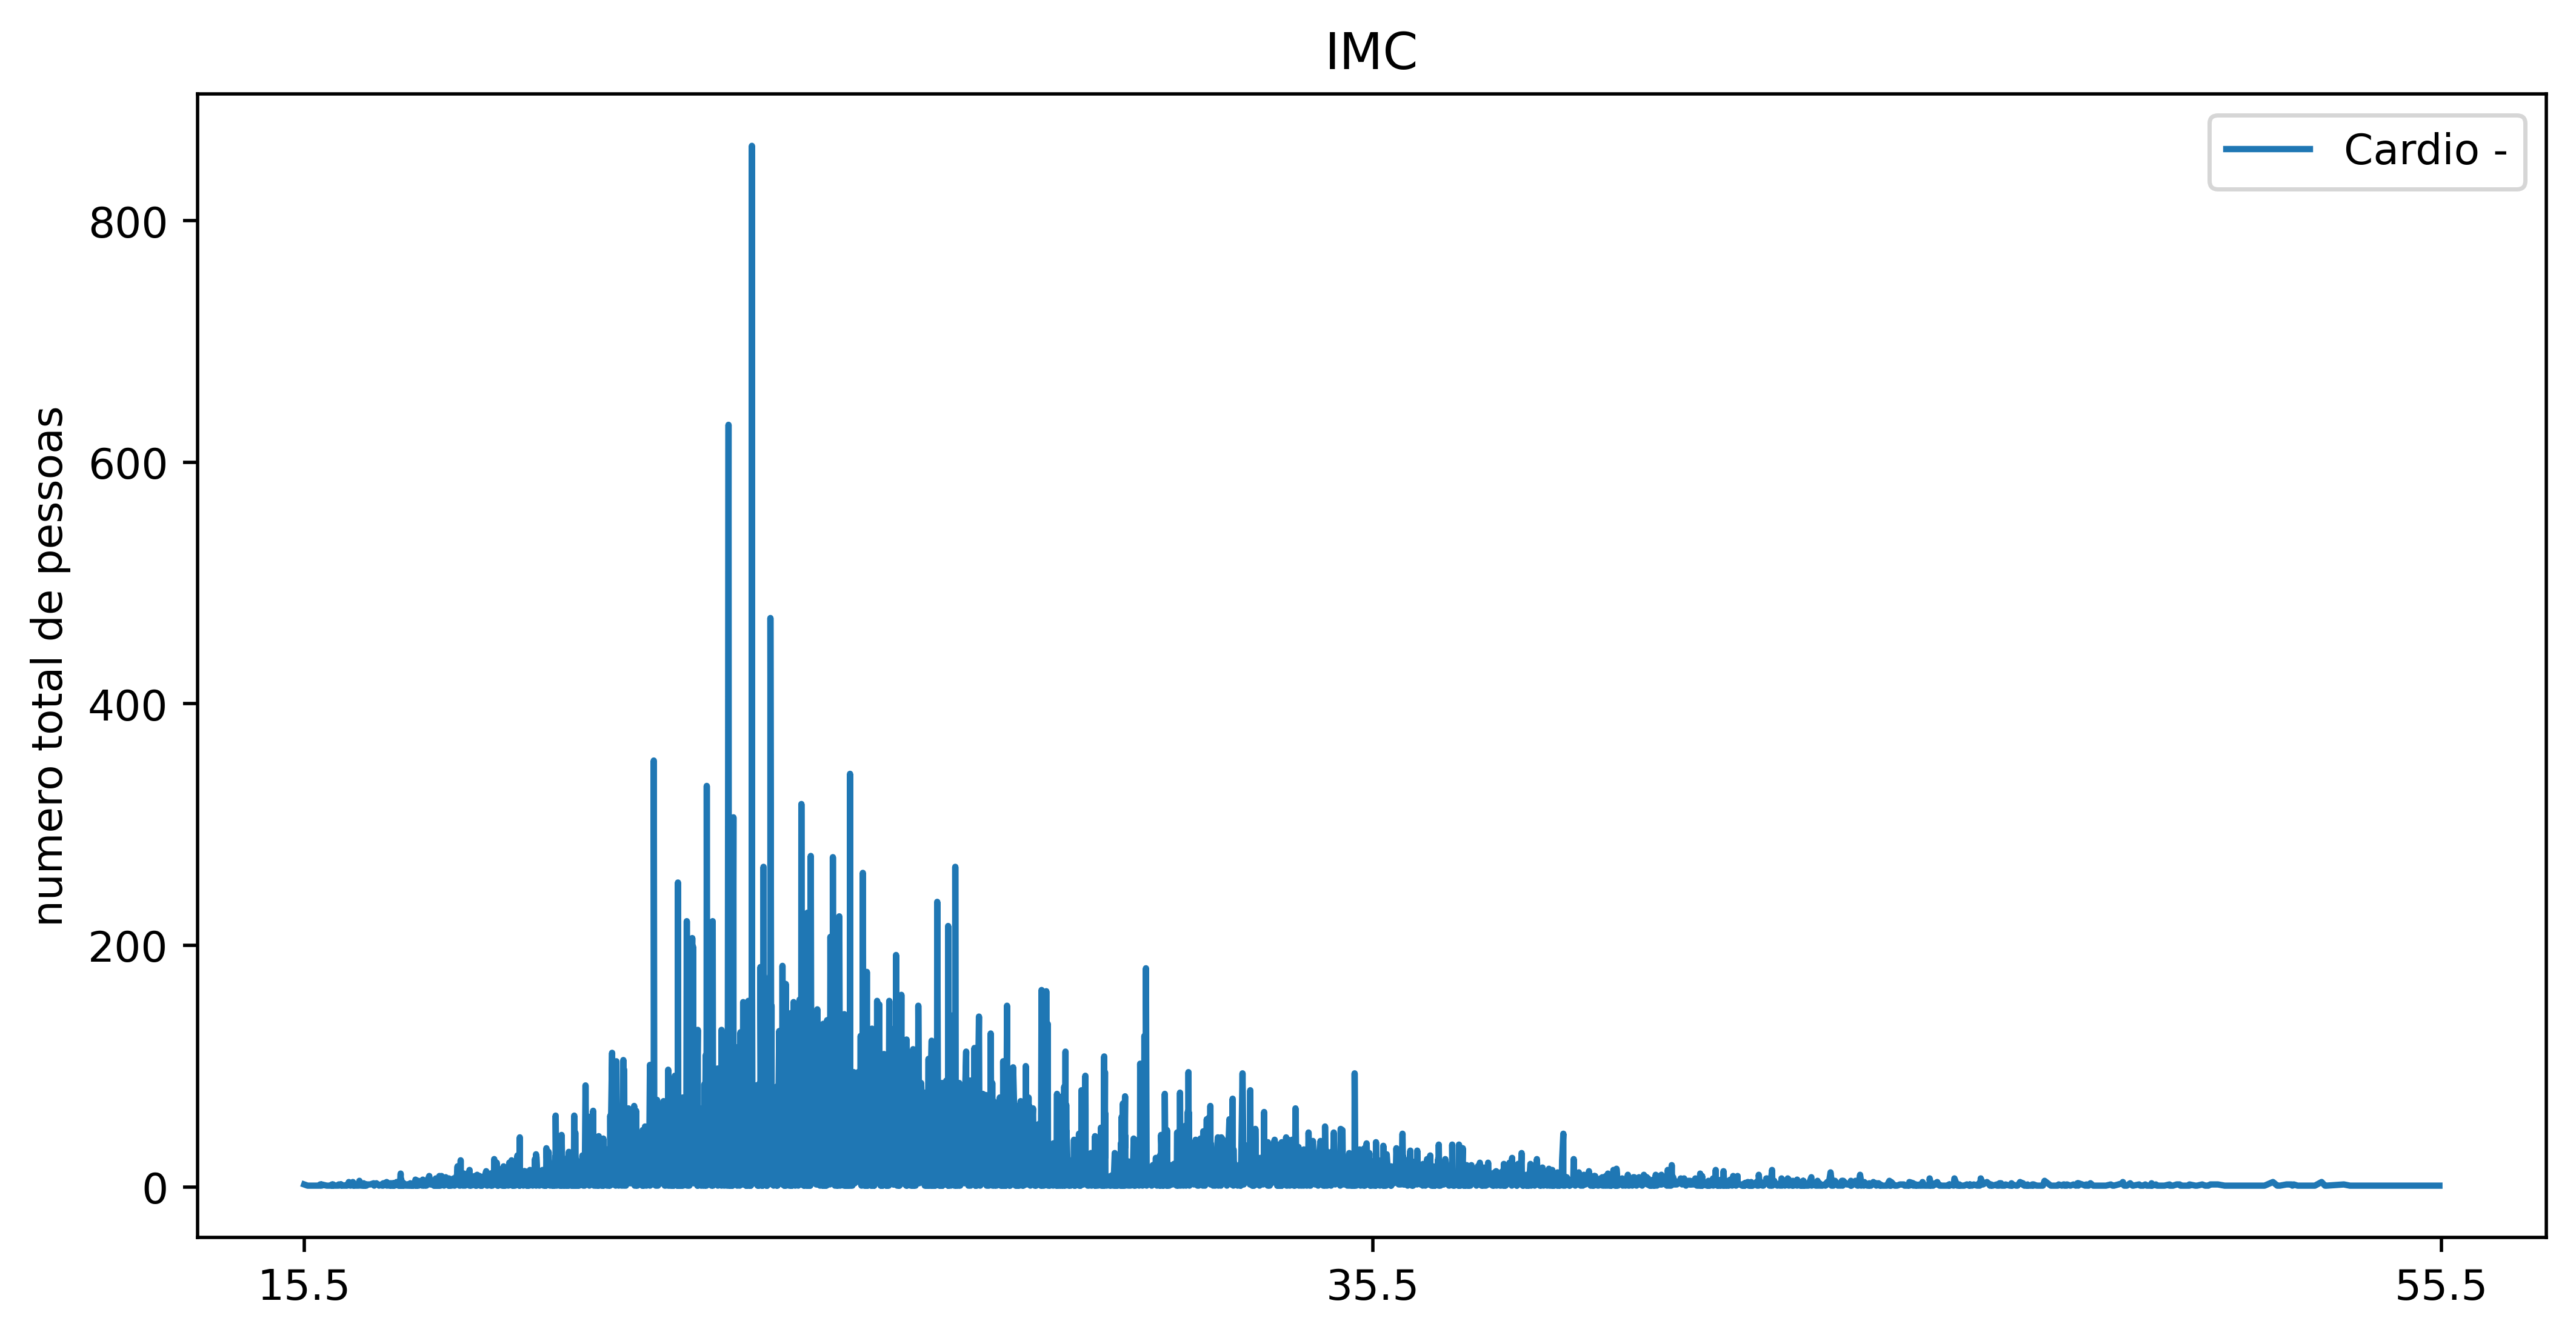

In [75]:
plt.figure(figsize = (10,5), dpi = 500)
plt.plot(peso, pes, label = 'Cardio -')
plt.title('IMC')
plt.xticks(np.arange(min(peso), max(peso) + 1, 20))
plt.ylabel('numero total de pessoas')
plt.legend()

<AxesSubplot:xlabel='imc'>

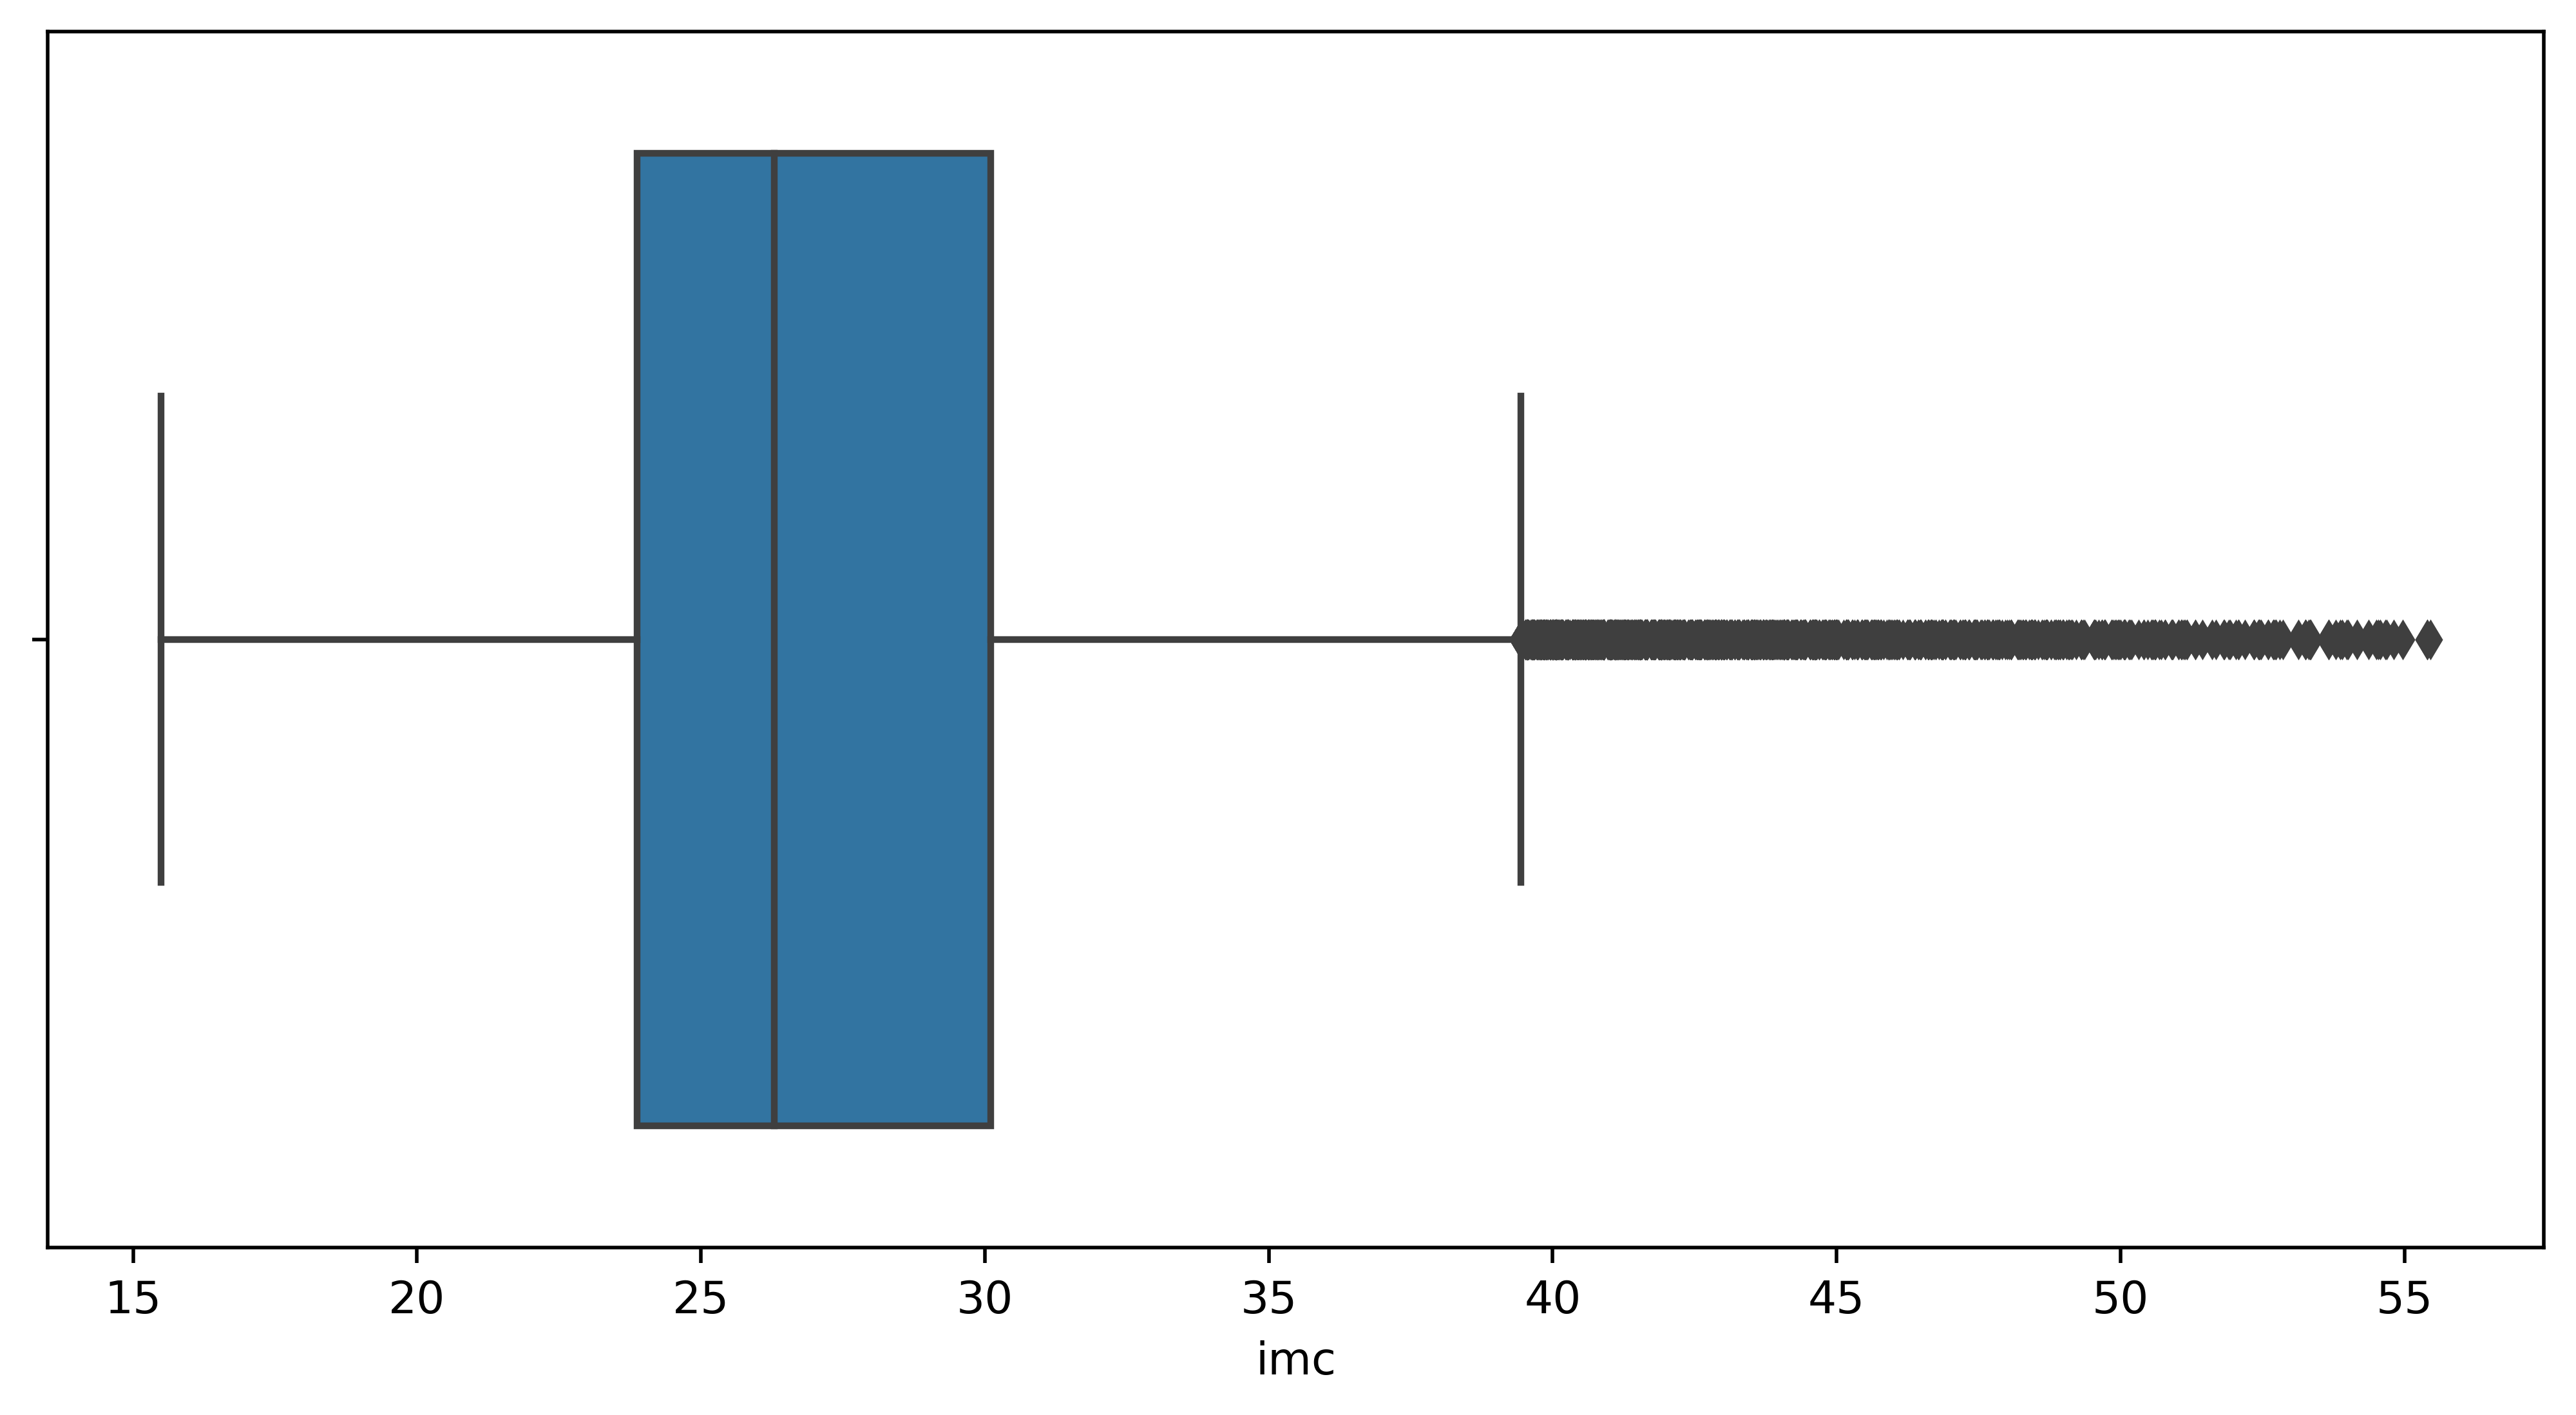

In [76]:
plt.figure(figsize = (10,5), dpi = 500)
sns.boxplot(x=df['imc'])

# Visualizar Valores duplicados 

In [77]:
duplicados = df.duplicated()

In [78]:
duplicados.value_counts()

False    65028
dtype: int64

### Não existem valores duplicados

# Plot Gráfico 

In [79]:
bebida = df[["cardio", "alco"]].value_counts()

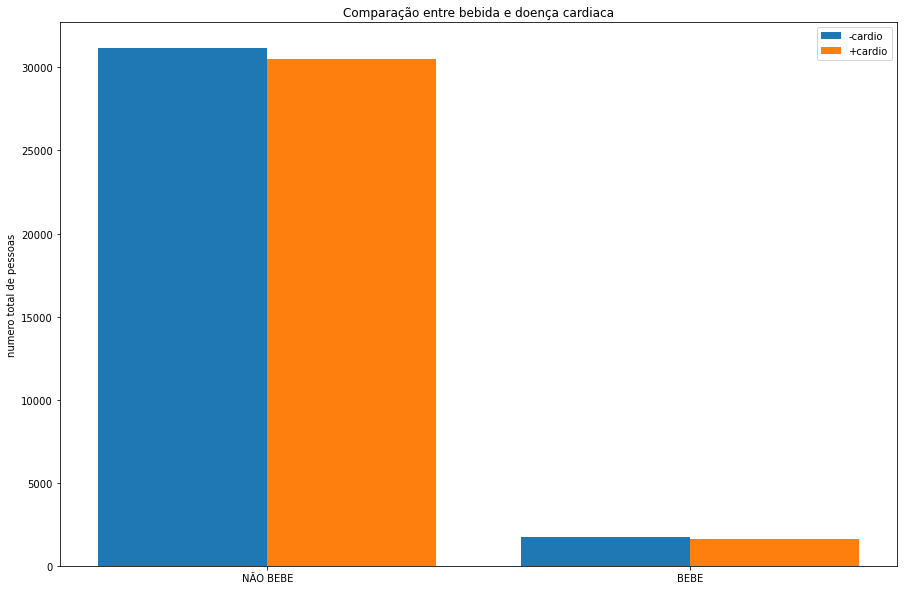

In [80]:
plt.figure(figsize = (15,10))
labels = ["NÃO BEBE", "BEBE"]
x = np.arange(2)
plt.bar(x - 0.2, bebida[0] , width = 0.4, label = "-cardio")
plt.bar(x + 0.2, bebida[1] , width = 0.4, label = "+cardio")
plt.xticks(x, labels)
plt.ylabel('numero total de pessoas')
plt.title("Comparação entre bebida e doença cardiaca")
plt.legend()

### Não é possivel encontrar uma relação entre bebida e doença cardiaca

In [81]:
fumo = df[["cardio", "smoke"]].value_counts()

In [82]:
fumo

cardio  smoke
0       0        29905
1       0        29442
0       1         3009
1       1         2672
dtype: int64

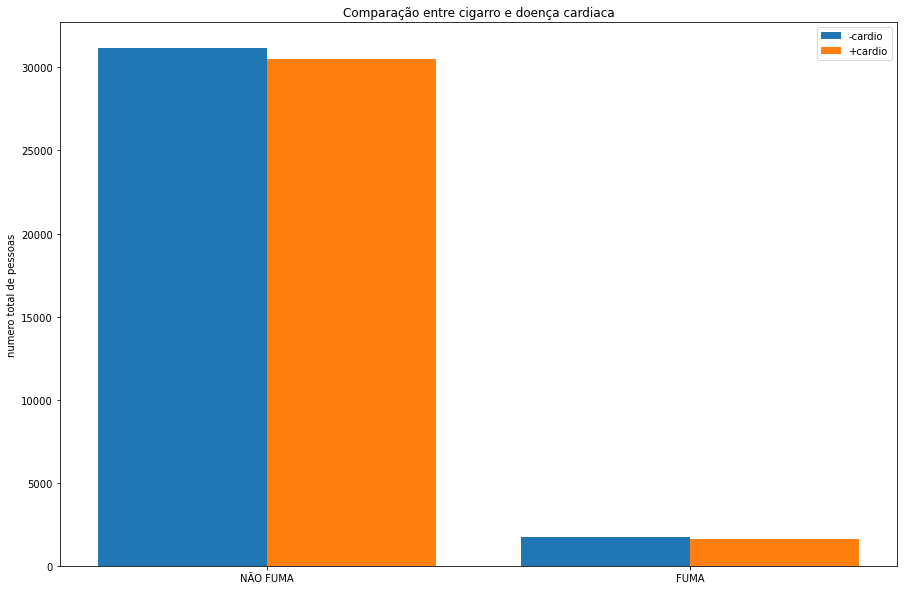

In [83]:
plt.figure(figsize = (15,10))
labels = ["NÃO FUMA", "FUMA"]
x = np.arange(2)
plt.bar(x - 0.2, bebida[0] , width = 0.4, label = "-cardio")
plt.bar(x + 0.2, bebida[1] , width = 0.4, label = "+cardio")
plt.xticks(x, labels)
plt.ylabel('numero total de pessoas')
plt.title("Comparação entre cigarro e doença cardiaca")
plt.legend()

### Não é possivel encontrar uma relação entre Cigarro e doença cardiaca

In [84]:
atv = df[["cardio", "active"]].value_counts()

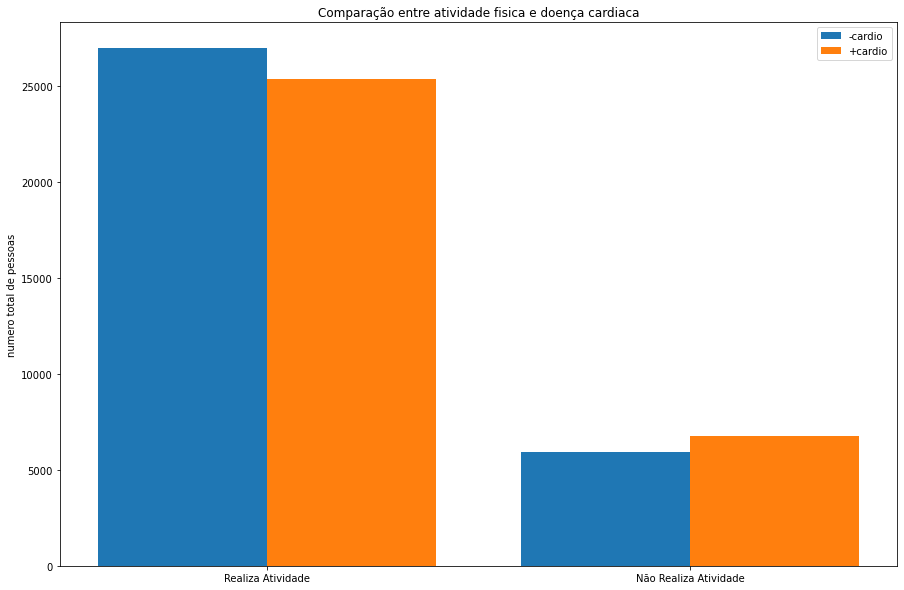

In [85]:
plt.figure(figsize = (15,10))
labels = ["Realiza Atividade", "Não Realiza Atividade"]
x = np.arange(2)
plt.bar(x - 0.2, atv[0] , width = 0.4, label = "-cardio")
plt.bar(x + 0.2, atv[1] , width = 0.4, label = "+cardio")
plt.xticks(x, labels)
plt.ylabel('numero total de pessoas')
plt.title("Comparação entre atividade fisica e doença cardiaca")
plt.legend()

### É possivel encontrar uma relação entre atividade Fisica e Doença Cardiaca, pois a porcentagem de casos de doenca cardiaco de quem realiza atividade fisica é menor do que quem não realiza atividade fisica 

In [86]:
gluc = df[["cardio","gluc"]].value_counts()

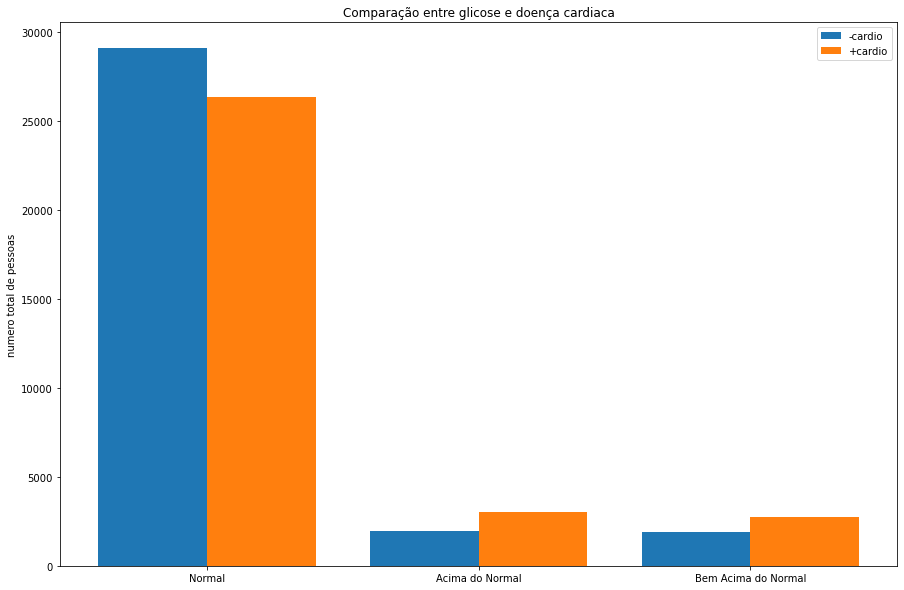

In [87]:
plt.figure(figsize = (15,10))
labels = ["Normal", "Acima do Normal", "Bem Acima do Normal"]
x = np.arange(len(gluc[1]))
plt.bar(x - 0.2, gluc[0] , width = 0.4, label = "-cardio")
plt.bar(x + 0.2, gluc[1] , width = 0.4, label = "+cardio")
plt.xticks(x, labels)
plt.ylabel('numero total de pessoas')
plt.title("Comparação entre glicose e doença cardiaca")
plt.legend()

### É possivel encontrar uma relação entre Glicose e doença cardiaca, pois a porcentagem de casos de doenca cardiaco de quem tem a glicose em um nivel normal é menor do que quem tem a glicose acima  ou bem acima do normal

In [88]:
cholesterol = df[["cardio","cholesterol"]].value_counts()

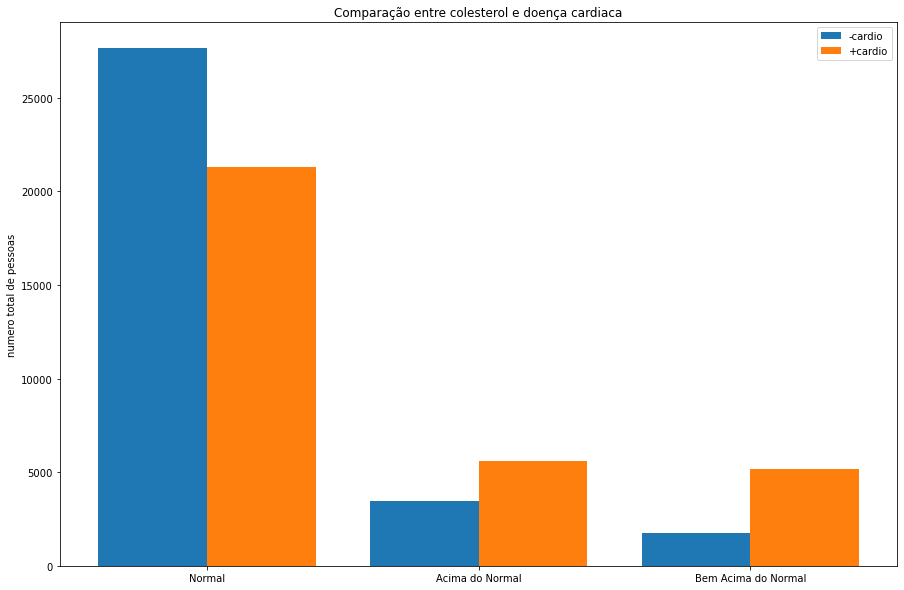

In [89]:
plt.figure(figsize = (15,10))
labels = ["Normal", "Acima do Normal", "Bem Acima do Normal"]
x = np.arange(len(cholesterol[0]))
plt.bar(x - 0.2, cholesterol[0] , width = 0.4, label = "-cardio")
plt.bar(x + 0.2, cholesterol[1] , width = 0.4, label = "+cardio")
plt.xticks(x, labels)
plt.ylabel('numero total de pessoas')
plt.title("Comparação entre colesterol e doença cardiaca")
plt.legend()

### É possivel encontrar uma relação entre Colesterol e doença cardiaca, pois a porcentagem de casos de doenca cardiaca de quem tem a Colesterol em um nivel normal é menor do que quem tem a Colesterol acima ou bem acima do normal

In [90]:
gender = df[["cardio","gender"]].value_counts()

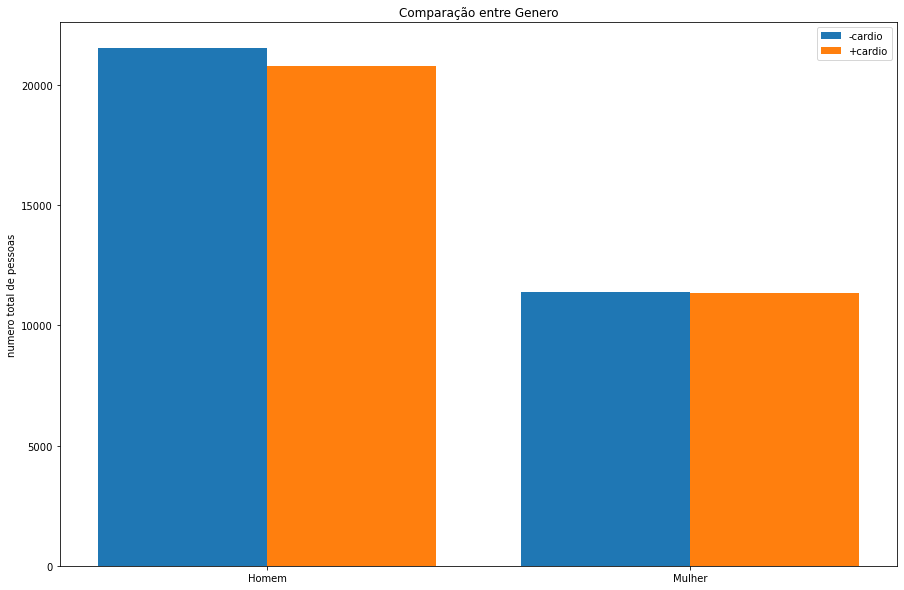

In [91]:
plt.figure(figsize = (15,10))
labels = ["Homem", "Mulher"]
x = np.arange(len(gender[0]))
plt.bar(x - 0.2, gender[0] , width = 0.4, label = "-cardio")
plt.bar(x + 0.2, gender[1] , width = 0.4, label = "+cardio")
plt.xticks(x, labels)
plt.ylabel('numero total de pessoas')
plt.title("Comparação entre Genero")
plt.legend()

### É possivel concluir que o genero possui uma leve relação com doença cardiaca, onde a porcentagem de casos de doença cardica em relação ao homem é menor do que a mulher

In [92]:
idades = sorted(df['age_int'].unique())
problema = []
nproblema = []

In [93]:
for k in idades:
    idade = df[(df['age_int'] == k)]
    doenca = idade[(idade['cardio'] == 1)]
    problema.append(len(doenca))
    ndoenca = idade[(idade['cardio'] == 0)]
    nproblema.append(len(ndoenca))

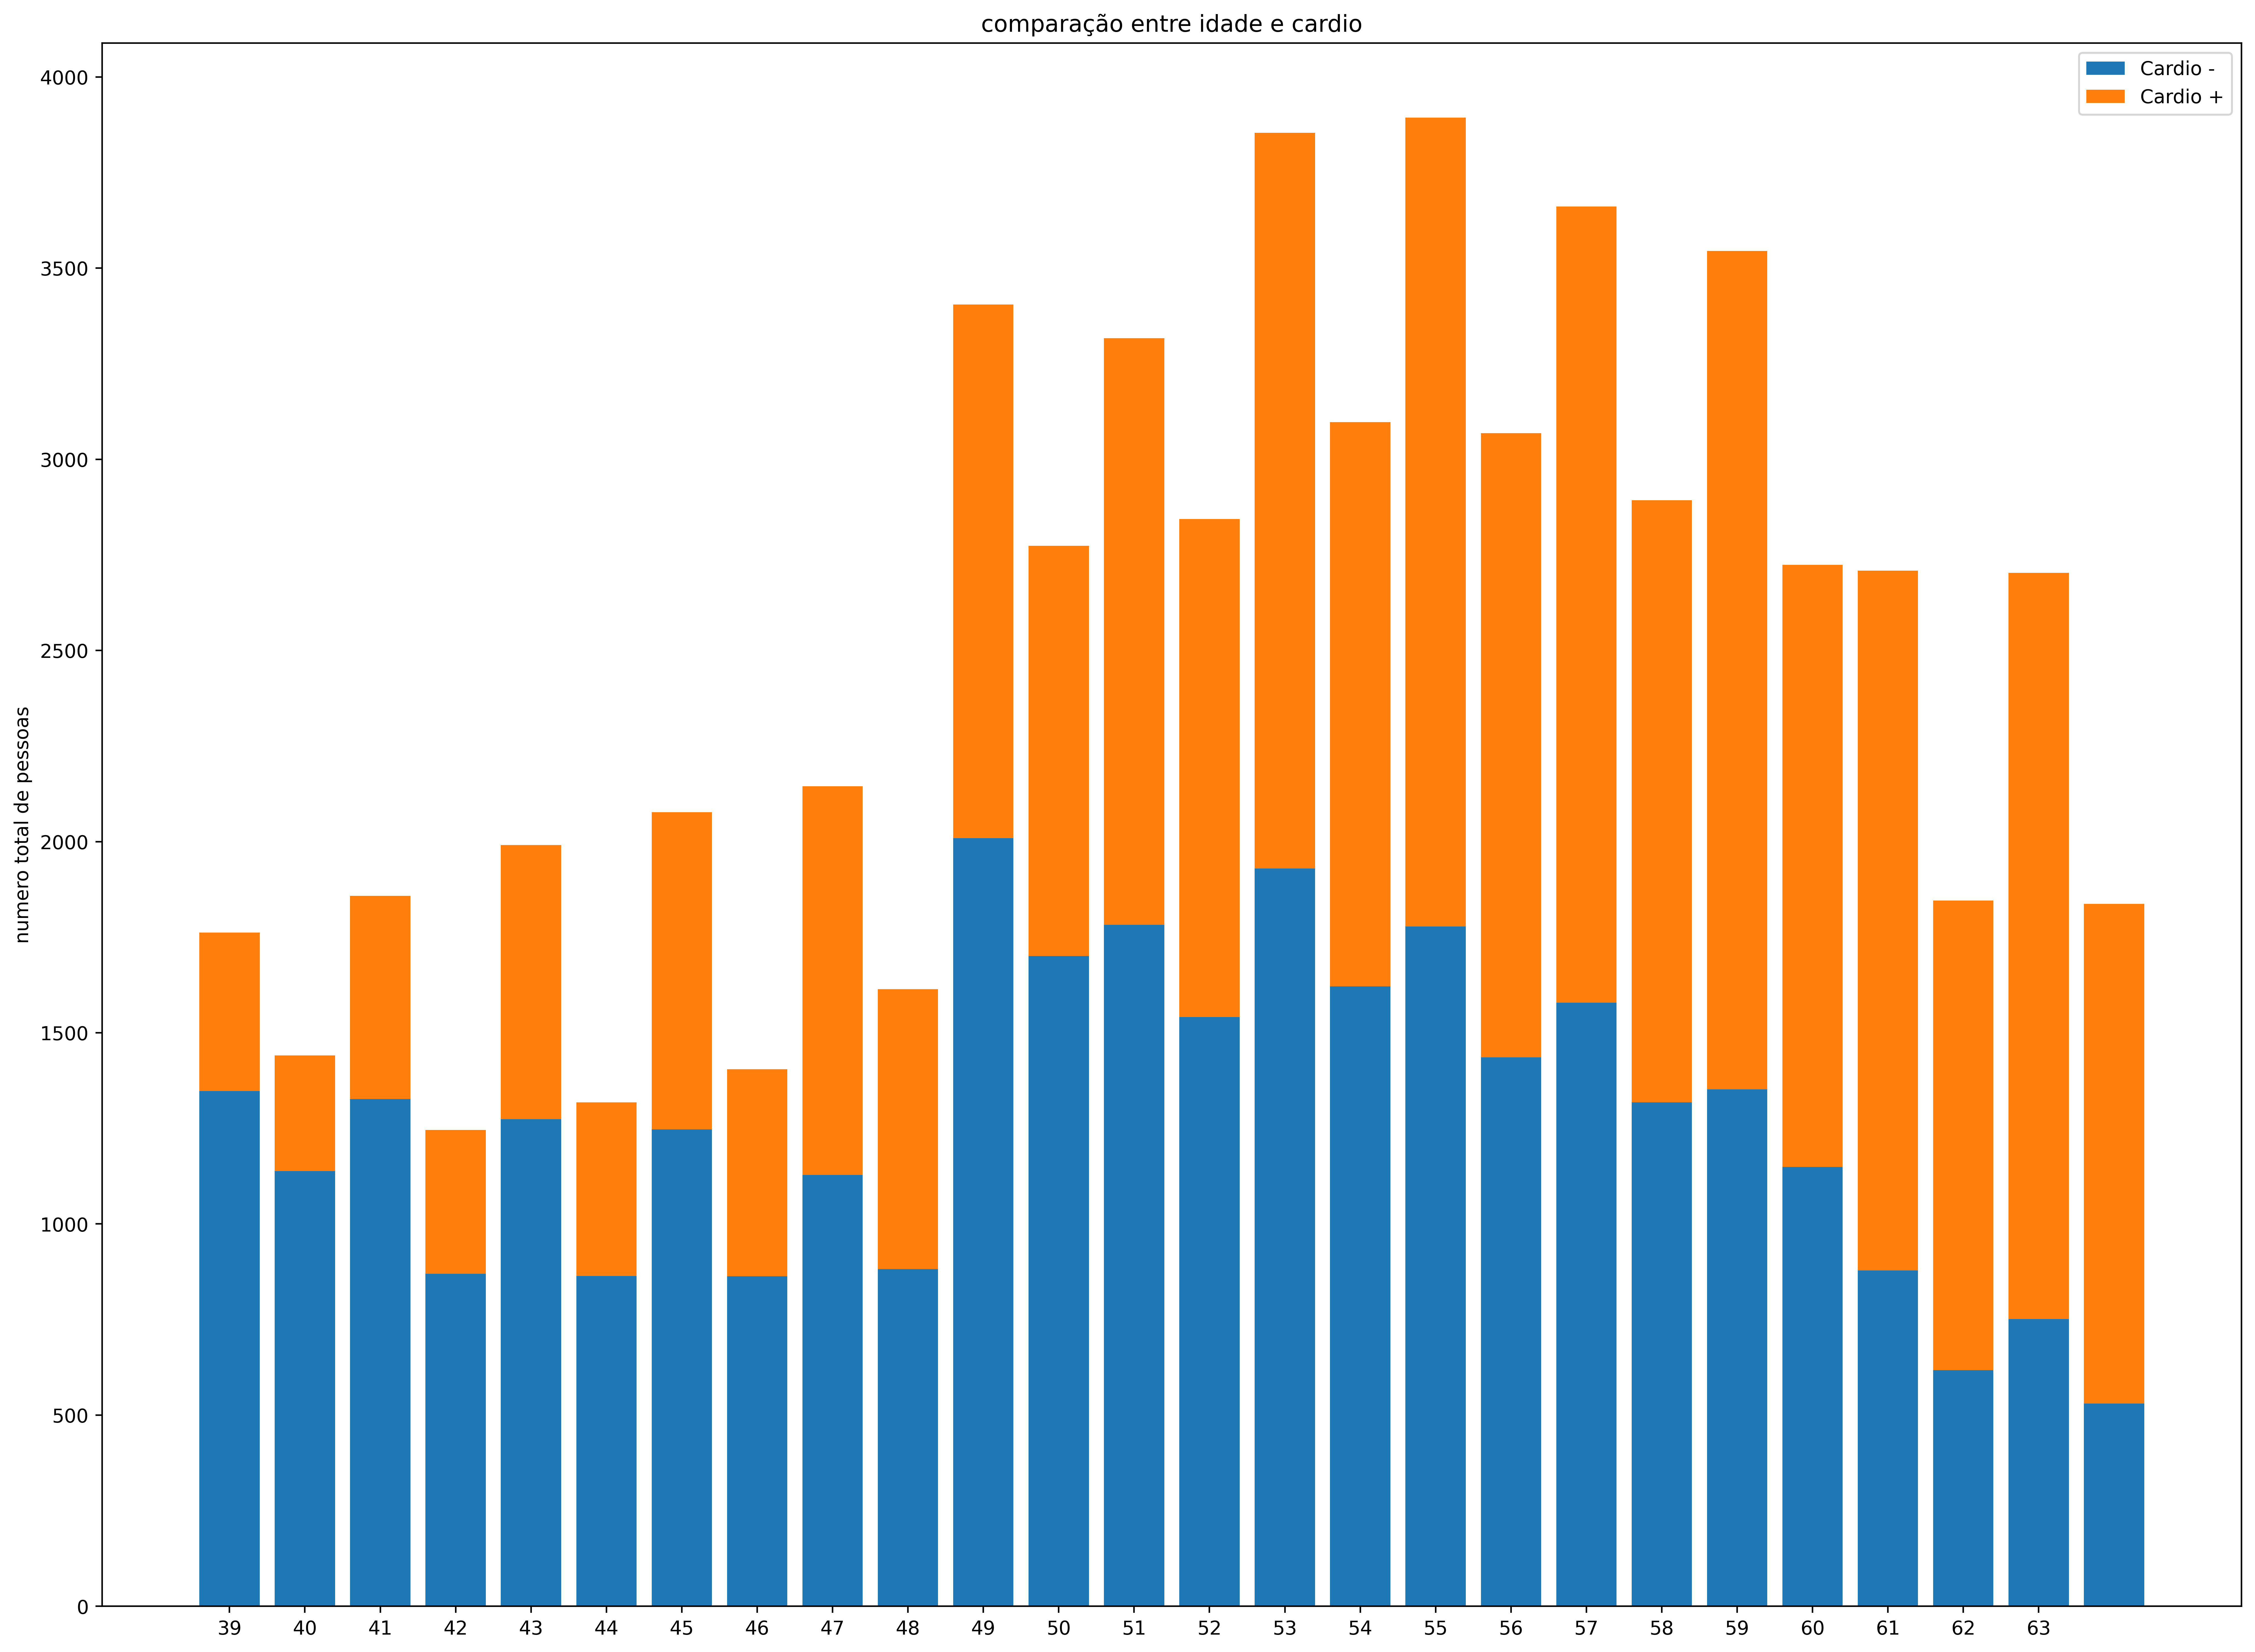

In [94]:
plt.figure(figsize = (20,15), dpi = 500)
plt.bar(idades, nproblema, label = 'Cardio -')
plt.bar(idades, problema, bottom = nproblema, label = 'Cardio +')
plt.title('comparação entre idade e cardio')
plt.ylabel('numero total de pessoas')
plt.xticks(np.arange(min(idades), max(idades)))
plt.legend()

### É possivel visualziar que idade é um fator importante para a presença de doença cardiaca, pois quanto maior a idade maior a porcentagem de pessoas com doenças cardiacas

<Figure size 7500x5000 with 0 Axes>

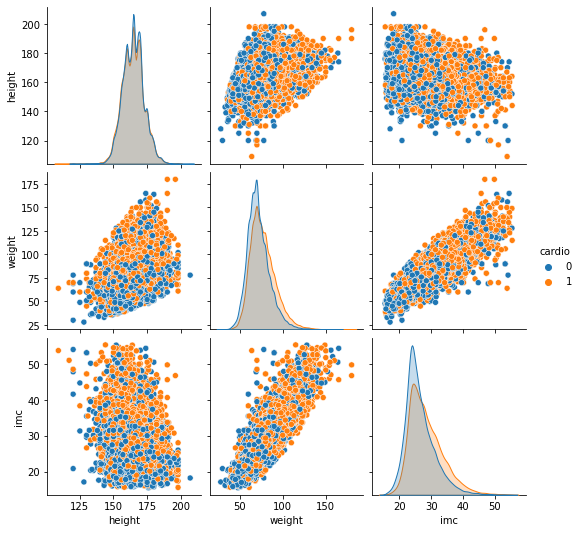

In [95]:
plt.figure(figsize = (15,10), dpi = 500)
sns.pairplot(data=df[["height", "weight", "cardio", "imc"]], hue="cardio")

###  É possivel visualizar uma minima relação entre peso, imc e doença cardiaca, mas nada muito significativo

# Remoção das colunas que não serão ultilizadas

In [96]:
df = df.drop(['id', 'age','imc'], axis=1)

# Divisão em Treino e Teste

### Será excluido colunas em que os seus atributos não cotribuem para a previsão de doença cardiaca

In [97]:
###df = df.drop(['smoke', 'alco'], axis=1)

In [98]:
X = df.drop(columns=["cardio"])

In [99]:
y = df.cardio

# Feature Engineering usando Lasso

In [100]:
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)

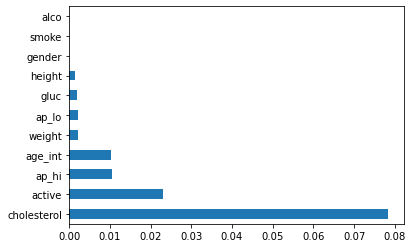

In [101]:
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [102]:
X = df[['cholesterol', 'active', 'ap_hi', 'age_int']]

In [103]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização dos Dados 

In [104]:
sca = preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

# Treino dos modelos de classificação

In [105]:
modelos = [DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    RandomForestClassifier,
    SVC,
    ]

In [106]:
modelos2 = ["DummyClassifier",
    "LogisticRegression",
    "DecisionTreeClassifier",
    "KNeighborsClassifier",
    "GaussianNB",
    "RandomForestClassifier",
    "SVC"]

In [107]:
k = 0
for modelo in modelos:
    clf = modelo()
    clf.fit(X_train, y_train)
    resultado = clf.score(X_test, y_test, sample_weight=None)
    print (modelos2[k],":",resultado)
    k += 1

DummyClassifier : 0.5043313342559844
LogisticRegression : 0.721103080629453
DecisionTreeClassifier : 0.7241785842431698
KNeighborsClassifier : 0.6946024911579272
GaussianNB : 0.7083397406325286
RandomForestClassifier : 0.7256650776564663
SVC : 0.725870111230714


# Matriz de Confusão

In [108]:
k = 0
for modelo in modelos:
    clf = modelo()
    clf.fit(X_train, y_train)
    prev = clf.predict(X_test)
    print (modelos2[k], ":", "\n", confusion_matrix(y_test, prev), "\n")
    k += 1

DummyClassifier : 
 [[9839    0]
 [9670    0]] 

LogisticRegression : 
 [[7777 2062]
 [3379 6291]] 

DecisionTreeClassifier : 
 [[7730 2109]
 [3272 6398]] 

KNeighborsClassifier : 
 [[6824 3015]
 [2943 6727]] 

GaussianNB : 
 [[8178 1661]
 [4029 5641]] 

RandomForestClassifier : 
 [[7656 2183]
 [3182 6488]] 

SVC : 
 [[7952 1887]
 [3461 6209]] 



# Conclusão 

### Dentre os modelos apresentados o que teve a melhor taxa de acerto foi o SVC e o que teve a menor taxa de falso negativo foi o GaussianNB, portanto caso esses modelos sejam aplicados no dia a dia de um hospital ou uma clinica, deve ser usado os dois algorithimos citados anteriormente, onde o primeiro será o SVC e caso o resultado seja negativo deve ser usado o modelo GaussianNB para tentar diminuir a chance de ser um falso negativo.